<a href="https://colab.research.google.com/github/Prayogkarki/study/blob/main/Python_and_Data_Science_for_Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
cust_df = pd.read_csv('http://bit.ly/PMR-ch4')

In [2]:
#sumilating the data 
import numpy as np
n_cust = 1000
np.random.seed(21821)
cust_df = pd.DataFrame({'cust_id': pd.Categorical(range(n_cust))})

In [3]:
cust_df['age'] = np.random.normal(loc=35, scale=5, size=n_cust)
cust_df['credit_score'] = np.random.normal(loc=3 * cust_df.age + 620,
scale=50,
size=n_cust)
cust_df['email'] = pd.Categorical(np.random.choice(a=['yes', 'no'],
p=[0.8, 0.2],
size=n_cust))
cust_df['distance_to_store'] = np.exp(np.random.normal(loc=2,
scale=1.2,
size=n_cust))

In [4]:
cust_df.describe(include='all')

,cust_id,age,credit_score,email,distance_to_store
count,1000.0,1000.000000,1000.000000,1000,1000.000000
unique,1000.0,NaN,NaN,2,NaN
top,999.0,NaN,NaN,yes,NaN
freq,1.0,NaN,NaN,807,NaN
mean,NaN,34.933972,725.224636,NaN,15.765725
std,NaN,5.070098,50.152653,NaN,26.808774
min,NaN,16.413932,561.349990,NaN,0.082841
25%,NaN,31.498928,692.097950,NaN,3.570304
50%,NaN,35.042813,727.263135,NaN,7.451220
75%,NaN,38.437630,758.936799,NaN,17.274832


In [6]:
#Simulating Online and In-store Sales Data
mu = 15 + ((cust_df.email == 'yes') * 15 -0.7 * (cust_df.age - cust_df.age.median()))
n = 0.3
prob = n / (n + mu)
cust_df['online_visits'] = np.random.negative_binomial(n=0.3,
p=prob,
size=n_cust)

In [10]:
cust_df['online_trans'] = np.random.binomial(n=cust_df.online_visits,
p=0.3,
size=n_cust)
cust_df['online_spend'] = (np.exp(np.random.normal(loc=3,
scale=0.1,
size=n_cust))
*cust_df.online_trans)

In [11]:
mu = 3 / np.sqrt(cust_df.distance_to_store)
n = 5
prob = n / (n + mu)
cust_df['store_trans'] = np.random.negative_binomial(n=n,
p=prob,
size=n_cust)
cust_df['store_spend'] = (np.exp(np.random.normal(loc=3.5,
scale=0.4,
size=n_cust))
* cust_df.store_trans)

cust_df.describe()

,age,credit_score,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,34.933972,725.224636,15.765725,28.420000,8.642000,174.097543,1.36300,50.758043
std,5.070098,50.152653,26.808774,55.905143,17.029617,342.871855,1.62045,72.459636
min,16.413932,561.349990,0.082841,0.000000,0.000000,0.000000,0.00000,0.000000
25%,31.498928,692.097950,3.570304,0.000000,0.000000,0.000000,0.00000,0.000000
50%,35.042813,727.263135,7.451220,6.000000,2.000000,39.679665,1.00000,31.739019
75%,38.437630,758.936799,17.274832,31.000000,9.000000,186.207202,2.00000,66.210461
max,50.523265,872.288340,352.723643,654.000000,202.000000,3947.458381,13.00000,701.791560


In [12]:
#Simulating Satisfaction Survey Responses
sat_overall = pd.Series(np.random.normal(loc=3.1,
scale=0.7,
size=n_cust))
sat_overall.describe()

count    1000.000000
mean        3.078219
std         0.709484
min         0.694006
25%         2.623192
50%         3.060224
75%         3.545636
max         5.151802
dtype: float64

In [13]:
sat_service = np.floor(sat_overall + np.random.normal(loc=0.5,
scale=0.4,
size=n_cust))
sat_selection = np.floor(sat_overall + np.random.normal(loc=-0.2,
scale=0.6,
size=n_cust))
sat_service.describe()

count    1000.000000
mean        3.053000
std         0.866569
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
dtype: float64

In [14]:
sat_service[sat_service > 5] = 5
sat_service[sat_service < 1] = 1
sat_selection[sat_selection > 5] = 5
sat_selection[sat_selection < 1] = 1
sat_service.describe()

count    1000.000000
mean        3.051000
std         0.855061
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
dtype: float64

In [15]:
# Simulating Non-response Data
no_response = np.random.binomial(n=1,
p=cust_df.age/100,
size=n_cust).astype(bool)
sat_service[no_response] = np.nan
sat_selection[no_response] = np.nan
sat_service.describe()


count    646.000000
mean       3.047988
std        0.851367
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
dtype: float64

In [16]:
cust_df['sat_service'] = sat_service
cust_df['sat_selection'] = sat_selection
cust_df.describe()

,age,credit_score,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,646.000000,646.000000
mean,34.933972,725.224636,15.765725,28.420000,8.642000,174.097543,1.36300,50.758043,3.047988,2.438080
std,5.070098,50.152653,26.808774,55.905143,17.029617,342.871855,1.62045,72.459636,0.851367,0.927632
min,16.413932,561.349990,0.082841,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
25%,31.498928,692.097950,3.570304,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,2.000000
50%,35.042813,727.263135,7.451220,6.000000,2.000000,39.679665,1.00000,31.739019,3.000000,2.000000
75%,38.437630,758.936799,17.274832,31.000000,9.000000,186.207202,2.00000,66.210461,4.000000,3.000000
max,50.523265,872.288340,352.723643,654.000000,202.000000,3947.458381,13.00000,701.791560,5.000000,5.000000


  cust_id        age  credit_score  ... store_spend  sat_service  sat_selection
0       0  46.719825    735.837331  ...   40.211012          3.0            3.0
1       1  39.283359    656.599440  ...   44.549967          NaN            NaN
2       2  33.574168    665.934422  ...  124.305026          4.0            3.0
3       3  43.564256    718.456166  ...   51.213276          NaN            NaN
4       4  31.358552    626.323897  ...   77.895403          2.0            1.0

[5 rows x 12 columns]


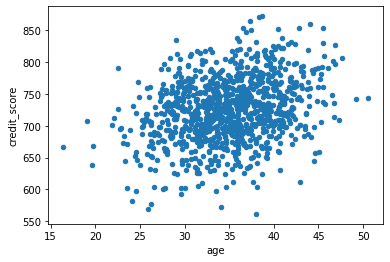

In [20]:
# Exploring Associations between Variables with scatterplots
print(cust_df.head())

cust_df.plot(kind='scatter', x='age', y='credit_score')

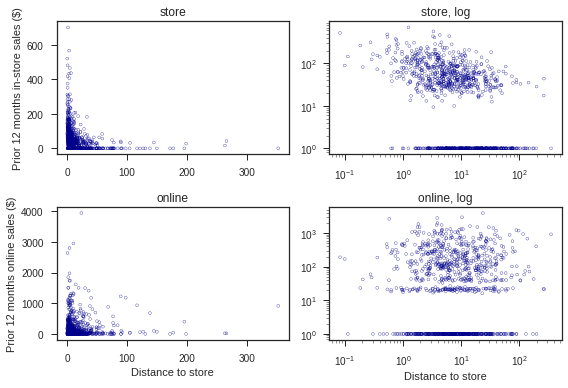

In [22]:
## Combining Plots in a Single Graphics Object 
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
plt.style.use('seaborn-white')
plt.style.use('seaborn-ticks')

plt.subplot(221)
plt.scatter(x=cust_df.distance_to_store,
y=cust_df.store_spend,
c='none',
edgecolor='darkblue',
s=8)
plt.title('store')
plt.ylabel('Prior 12 months in-store sales ($)')
plt.subplot(223)
plt.scatter(x=cust_df.distance_to_store,
y=cust_df.online_spend,
c='none',
edgecolor='darkblue',
s=8)
plt.title('online')
plt.xlabel('Distance to store')
plt.ylabel('Prior 12 months online sales ($)')
plt.subplot(222)
plt.scatter(x=cust_df.distance_to_store,
y=cust_df.store_spend+1,
c='none',
edgecolor='darkblue',
s=8)
plt.title('store, log')
plt.xscale('log')
plt.yscale('log')
plt.subplot(224)
plt.scatter(x=cust_df.distance_to_store,
y=cust_df.online_spend+1,
c='none',
edgecolor='darkblue',
s=8)
plt.title('online, log')
plt.xlabel('Distance to store')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

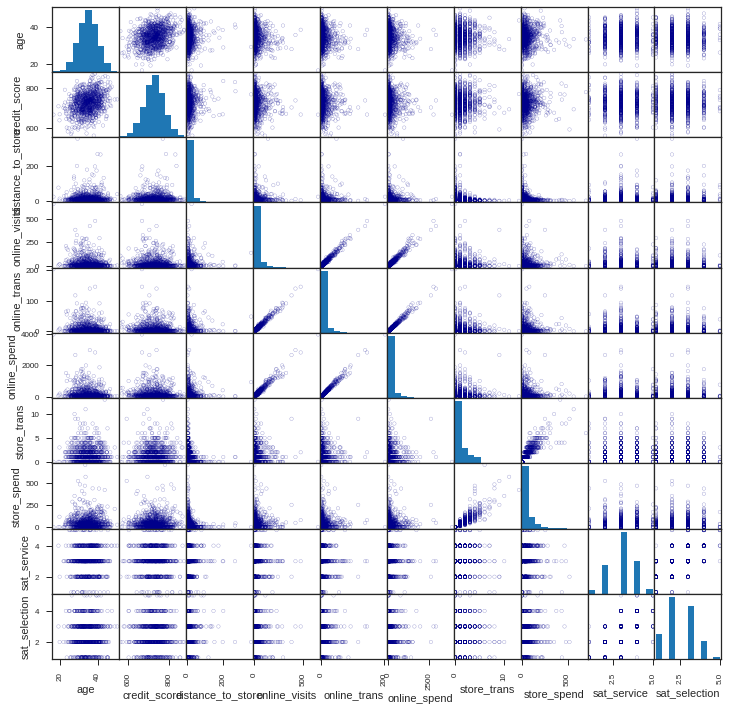

In [23]:
## Scatterplot Matrics 
_ = pd.plotting.scatter_matrix(cust_df, figsize=(12,12),
c='none', edgecolor='darkblue')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


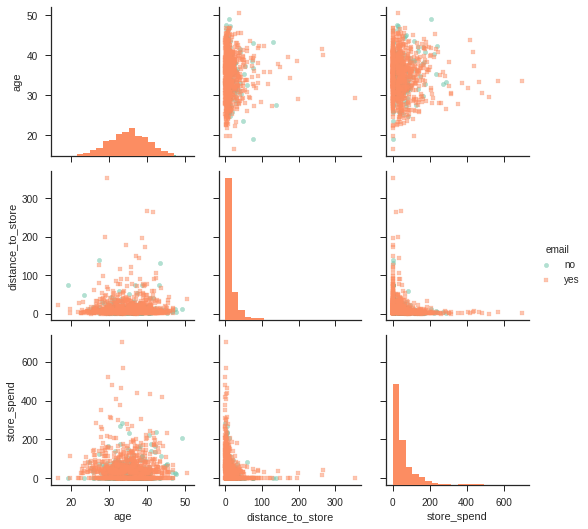

In [24]:
import seaborn as sns
g = sns.PairGrid(cust_df[['age', 'distance_to_store',
'store_spend', 'email']],
size=2.5,
hue='email', palette='Set2',
hue_kws={"marker": ['o', 's']})
_ = g.map_offdiag(plt.scatter, s=20, alpha=0.5)
_ = g.map_diag(plt.hist, bins=20)
_ = g.add_legend()

In [25]:
## Correlation Coefficients 
np.cov(cust_df.age, cust_df.credit_score)

array([[  25.70589016,   74.54758431],
       [  74.54758431, 2515.28862282]])

In [26]:
np.corrcoef(cust_df.age, cust_df.credit_score)

array([[1.        , 0.29317257],
       [0.29317257, 1.        ]])

In [27]:
np.cov(cust_df.age,
cust_df.credit_score)[0,1]/(cust_df.age.std() *
cust_df.credit_score.std())

0.2931725725355575

In [28]:
# Correlation Tests
from scipy import stats
stats.pearsonr(cust_df.age, cust_df.credit_score)

(0.29317257253555745, 2.848458409182164e-21)

In [29]:
cust_df.corr()

,age,credit_score,distance_to_store,online_visits,online_trans,online_spend,store_trans,store_spend,sat_service,sat_selection
age,1.000000,0.293173,0.018909,-0.135676,-0.136697,-0.136736,-0.031095,-0.010359,0.003548,-0.022695
credit_score,0.293173,1.000000,0.053541,-0.072078,-0.074317,-0.069710,0.011311,0.028448,-0.019413,-0.011955
distance_to_store,0.018909,0.053541,1.000000,0.018296,0.026200,0.021934,-0.253613,-0.222013,0.015368,0.022341
online_visits,-0.135676,-0.072078,0.018296,1.000000,0.990780,0.983491,-0.007464,-0.006987,-0.060289,-0.032670
online_trans,-0.136697,-0.074317,0.026200,0.990780,1.000000,0.994112,-0.013822,-0.012709,-0.057219,-0.033463
online_spend,-0.136736,-0.069710,0.021934,0.983491,0.994112,1.000000,-0.010152,-0.012037,-0.054077,-0.024773
store_trans,-0.031095,0.011311,-0.253613,-0.007464,-0.013822,-0.010152,1.000000,0.871127,0.020166,0.025214
store_spend,-0.010359,0.028448,-0.222013,-0.006987,-0.012709,-0.012037,0.871127,1.000000,0.040917,0.044680
sat_service,0.003548,-0.019413,0.015368,-0.060289,-0.057219,-0.054077,0.020166,0.040917,1.000000,0.609392
sat_selection,-0.022695,-0.011955,0.022341,-0.032670,-0.033463,-0.024773,0.025214,0.044680,0.609392,1.000000


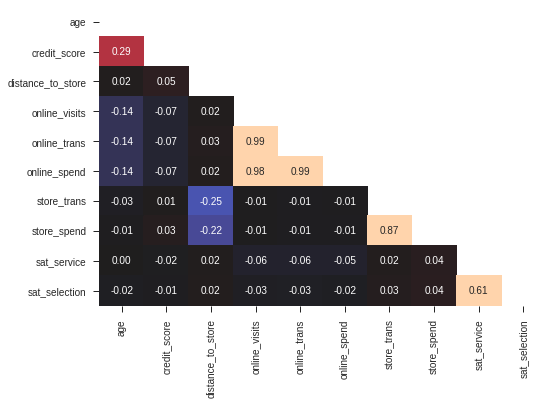

In [31]:
sns.heatmap(cust_df.corr(),
vmin=-0.3,
vmax=0.6,
center=0,
annot=True,
fmt='.2f',
mask=~np.tri(cust_df.corr().shape[1], k=-1, dtype=bool),
cbar=False)

In [32]:
## Typical Marketing Data Transformations
dts_bc, lmda = stats.boxcox(cust_df.distance_to_store)
lmda

0.018447924984682788

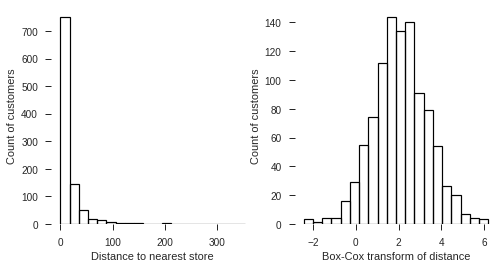

In [34]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(cust_df.distance_to_store,bins=20,
edgecolor='k',
facecolor='none',
linewidth=1.2)
plt.xlabel('Distance to nearest store')
plt.ylabel('Count of customers')
plt.box(False)
plt.subplot(1,2,2)
plt.hist(dts_bc,
bins=20,
edgecolor='k',
facecolor='none',
linewidth=1.2)
plt.xlabel('Box-Cox transform of distance')
plt.ylabel('Count of customers')
plt.box(False)

In [35]:
sspend_bc, lmda_age = stats.boxcox(cust_df.age)
print(lmda_age)

sspend_bc, lmda_sspend = stats.boxcox(cust_df.store_spend+.001)
print(lmda_sspend)

print(np.corrcoef(cust_df.distance_to_store, cust_df.store_spend))

print(np.corrcoef(dts_bc, sspend_bc))

1.2309735114681664
0.12642235297938723
[[ 1.         -0.22201339]
 [-0.22201339  1.        ]]
[[ 1.         -0.42162786]
 [-0.42162786  1.        ]]


Text(0, 0.5, 'Customer satisfaction with selection')

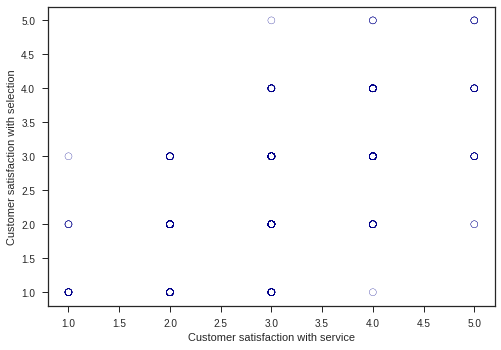

In [36]:
## Exploring Associations in Survey Responses

plt.scatter(x=cust_df.sat_service,
y=cust_df.sat_selection,
c='none',
edgecolor='darkblue')
plt.xlabel('Customer satisfaction with service')
plt.ylabel('Customer satisfaction with selection')

**Comparing Groups: Statistical Tests**

In [38]:
# data for comparing groups 
import pandas as pd
seg_df = pd.read_csv('http://bit.ly/PMR-ch5')
seg_df.head()


,Segment,age,gender,income,kids,own_home,subscribe
0,travelers,60.794945,male,57014.537526,0,True,False
1,travelers,61.764535,female,43796.941252,0,False,False
2,travelers,47.493356,male,51095.344683,0,True,False
3,travelers,60.963694,male,56457.722237,0,True,True
4,travelers,60.594199,female,103020.070798,0,True,False


In [40]:
## Testing Group Frequencies: scipy.stats.chisquare()

import numpy as np
from scipy import stats
tmp = np.repeat(range(4), [25, 25, 25, 20])
tmp_values, tmp_counts = np.unique(tmp, return_counts=True)
stats.chisquare(tmp_counts)

Power_divergenceResult(statistic=0.7894736842105263, pvalue=0.8519830972959184)

In [43]:
tmp_values, tmp_counts = np.unique(np.repeat(range(4),
[25, 25, 25, 10]),
return_counts=True)
print(tmp_counts)
print(stats.chisquare(tmp_counts))
print('Expected values: {}'.format(np.ones(4)*tmp_counts.sum()/4))
print ("*******************************************")
tmp_counts_small = tmp_counts/5
print(tmp_counts_small)
print(stats.chisquare(tmp_counts_small))
print('Expected values: {}'.format(np.ones(4)*tmp_counts_small.sum()/4))

print("**************************************************")
tmp_counts_large = tmp_counts*10 + 1900
print(tmp_counts_large)
print(stats.chisquare(tmp_counts_large))
print('Expected values: {}'.format(np.ones(4)*tmp_counts_large.sum()/4))

[25 25 25 10]
Power_divergenceResult(statistic=7.9411764705882355, pvalue=0.04724318343092867)
Expected values: [21.25 21.25 21.25 21.25]
*******************************************
[5. 5. 5. 2.]
Power_divergenceResult(statistic=1.5882352941176472, pvalue=0.6620603202525777)
Expected values: [4.25 4.25 4.25 4.25]
**************************************************
[2150 2150 2150 2000]
Power_divergenceResult(statistic=7.988165680473372, pvalue=0.04625691960442831)
Expected values: [2112.5 2112.5 2112.5 2112.5]


In [44]:
segment_values, segment_counts = np.unique(seg_df.Segment,
return_counts=True)
print(segment_counts)
stats.chisquare(segment_counts)

[ 70 100  80  50]


Power_divergenceResult(statistic=17.333333333333336, pvalue=0.0006034948344733141)

In [45]:
seg_df.Segment.value_counts()

suburb_mix    100
travelers      80
moving_up      70
urban_hip      50
Name: Segment, dtype: int64

In [46]:
stats.chisquare(seg_df.Segment.value_counts())

Power_divergenceResult(statistic=17.333333333333336, pvalue=0.0006034948344733141)

In [47]:
pd.crosstab(seg_df.subscribe, columns=seg_df.own_home)

own_home,False,True
subscribe,,
False,143,122
True,24,11


In [48]:
stats.chi2_contingency(pd.crosstab(seg_df.subscribe,
columns=seg_df.own_home))

(2.114527405072716,
 0.14590708913184341,
 1,
 array([[147.51666667, 117.48333333],
        [ 19.48333333,  15.51666667]]))

In [49]:
sub_by_home = pd.crosstab(seg_df.subscribe,
columns=seg_df.own_home)
print('chisq_stat: {0}\np_value: {1}\ndof: {2}\nexpected_values: {3}'
.format(*stats.chi2_contingency(sub_by_home)))

chisq_stat: 2.114527405072716
p_value: 0.14590708913184341
dof: 1
expected_values: [[147.51666667 117.48333333]
 [ 19.48333333  15.51666667]]


In [50]:
print('chisq_stat: {0}\np_value: {1}\ndof: {2}\nexpected_values: {3}'
.format(*stats.chi2_contingency(sub_by_home,
correction=False)))

chisq_stat: 2.6737316360934784
p_value: 0.10201657409843726
dof: 1
expected_values: [[147.51666667 117.48333333]
 [ 19.48333333  15.51666667]]


In [51]:
from statsmodels.stats import proportion as sms_proportion
sms_proportion.binom_test(count=12, nobs=20, prop=0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.5034446716308595

In [52]:
sms_proportion.proportion_confint(count=12, nobs=20, alpha=0.05)

(0.38529670275394107, 0.8147032972460588)

In [53]:
# More about binomial distribution
sms_proportion.binom_test(count=120, nobs=200, prop=0.5)


0.0056851559967502265

In [54]:
sms_proportion.proportion_confint(count=120, nobs=200, alpha=0.05)

(0.5321048559554297, 0.6678951440445703)

In [55]:
stats.binom.pmf([8, 9, 10, 11, 12], p=0.5, n=20).sum()

0.7368240356445304

In [56]:
stats.binom.pmf(range(8,13), p=0.5, n=20).sum()

0.7368240356445304

In [57]:
sms_proportion.proportion_confint(12, 20, method='agresti_coull')

(0.3860303790620197, 0.7817445893274164)

In [58]:
sms_proportion.proportion_confint(0, 20, method='agresti_coull')

(0.0, 0.18980956054248888)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


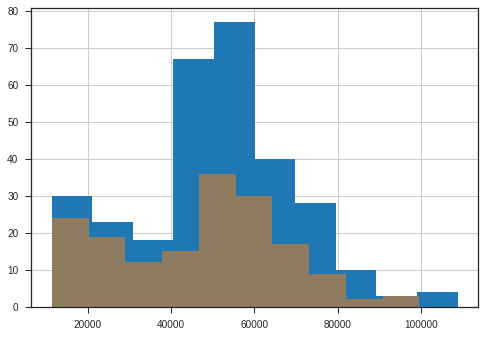

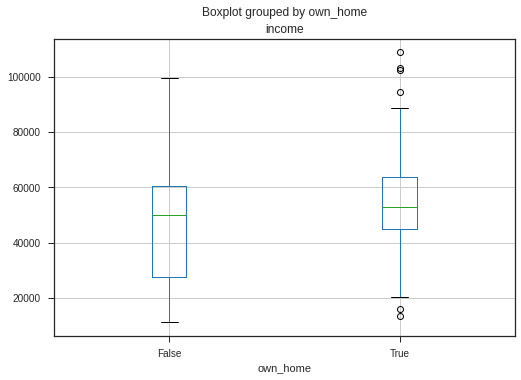

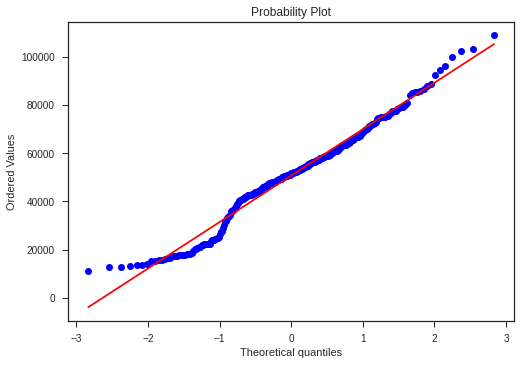

In [60]:
##Testing Group Means: t Test

from scipy import stats
import matplotlib.pyplot as plt
income_own_home = seg_df.income[seg_df.own_home]
income_dont_own_home = seg_df.income[~seg_df.own_home]
seg_df.income.hist() # Not shown

income_dont_own_home.hist(alpha=0.5) # Not shown
seg_df.boxplot(column='income', by='own_home') # Not shown
plt.figure()
_ = stats.probplot(seg_df.income, dist='norm', plot=plt) # Not shown

In [62]:
#First, we can look at the sample means and standard deviations for our data:
income_dont_own_home.mean(), income_dont_own_home.std()
income_own_home.mean(), income_own_home.std()


(55412.13190716664, 16917.48247661933)

In [63]:
stats.ttest_ind(income_dont_own_home, income_own_home,
equal_var=False)

Ttest_indResult(statistic=-3.960321465078199, pvalue=9.372809221211885e-05)

In [64]:
count_dont_own_home = income_dont_own_home.shape[0]
count_own_home = income_own_home.shape[0]
dof = count_dont_own_home + count_own_home - 2
geometric_mean_sem = np.sqrt(((count_dont_own_home - 1)
* stats.sem(income_dont_own_home)**2
+ (count_own_home - 1)
* stats.sem(income_own_home)**2)/dof)
stats.t.interval(alpha=0.95,
df=dof,
loc=income_dont_own_home.mean()\
- income_own_home.mean(),
scale=geometric_mean_sem)

(-11525.353750453647, -5514.206739896753)

In [66]:
def ttest(a, b):
# This function displays statistics on two groups, runs a t-test,
# and finds the 95% confidence interval of the mean difference
# between groups
# Get means and standard deviation of each group
  mean_a = a.mean()
  mean_b = b.mean()
  std_a = a.std()
  std_b = b.std()
  print('Group a - mean: {0} standard deviation: {1}'
  .format(mean_a, std_a))
  print('Group b - mean: {0} standard deviation: {1}\n'
  .format(mean_b, std_b))
  # Run a Welch's t-test between the groups
  ttest_out = stats.ttest_ind(a, b, equal_var=False)
  print("Welch's t-test statistic: {0}\np-value: {1}\n"
  .format(ttest_out.statistic, ttest_out.pvalue))
  # Find the 95% confidence interval using scipy.statst.interval
  # function. The difference in means is the location of the
  # distribution (loc parameter). The geometric mean of the
  # standard error of each group is the scale
  count_a = a.shape[0]
  count_b = b.shape[0]
  dof = count_a + count_b - 2
  geometric_mean_sem = np.sqrt(((count_a - 1) * stats.sem(a)**2
  + (count_b -1) * stats.sem(b)**2)/dof)
  print('95% confidence interval of the mean difference between a and'
  ' b:\n{0}'
  .format(stats.t.interval(alpha=0.95, df=dof,
  loc=mean_a - mean_b,
  scale=geometric_mean_sem)))

In [67]:
ttest(income_dont_own_home, income_own_home)

Group a - mean: 46892.35166199144 standard deviation: 20335.071080860198
Group b - mean: 55412.13190716664 standard deviation: 16917.48247661933

Welch's t-test statistic: -3.960321465078199
p-value: 9.372809221211885e-05

95% confidence interval of the mean difference between a and b:
(-11525.353750453647, -5514.206739896753)


In [68]:
traveler_subset = seg_df.loc[seg_df.Segment == 'travelers']
ttest(traveler_subset.income[~traveler_subset.own_home],
traveler_subset.income[traveler_subset.own_home])

Group a - mean: 62923.233941015686 standard deviation: 22233.49397700984
Group b - mean: 62449.90773236649 standard deviation: 19580.36093716457

Welch's t-test statistic: 0.09365502472389607
p-value: 0.925781815932494

95% confidence interval of the mean difference between a and b:
(-6107.12068516319, 7053.773102461581)


In [69]:
##Testing Multiple Group Means: Analysis of Variance (ANOVA)
stats.f_oneway(income_dont_own_home, income_own_home)


F_onewayResult(statistic=15.048326580627753, pvalue=0.000129010355414249)

In [70]:
import statsmodels.formula.api as smf
from statsmodels.stats import anova as sms_anova
income_home_lm = smf.ols('income ~ own_home', data=seg_df).fit()
sms_anova.anova_lm(income_home_lm)


,df,sum_sq,mean_sq,F,PR(>F)
own_home,1.0,5.374074e+09,5.374074e+09,15.048327,0.000129
Residual,298.0,1.064221e+11,3.571210e+08,NaN,NaN


In [71]:
income_segment_lm = smf.ols('income ~ Segment', data=seg_df).fit()
sms_anova.anova_lm(income_segment_lm)

,df,sum_sq,mean_sq,F,PR(>F)
Segment,3.0,6.008669e+10,2.002890e+10,114.651236,2.794439e-49
Residual,296.0,5.170946e+10,1.746941e+08,NaN,NaN


In [72]:
income_home_segment_lm = smf.ols('income ~ Segment + own_home',
data=seg_df).fit()
sms_anova.anova_lm(income_home_segment_lm)

,df,sum_sq,mean_sq,F,PR(>F)
Segment,3.0,6.008669e+10,2.002890e+10,114.352374,3.858516e-49
own_home,1.0,4.000708e+07,4.000708e+07,0.228415,6.330554e-01
Residual,295.0,5.166945e+10,1.751507e+08,NaN,NaN


In [73]:
income_home_segment_lm = smf.ols('income ~ Segment * own_home',
data=seg_df).fit()
sms_anova.anova_lm(income_home_segment_lm)

,df,sum_sq,mean_sq,F,PR(>F)
Segment,3.0,6.008669e+10,2.002890e+10,113.502010,9.839888e-49
own_home,1.0,4.000708e+07,4.000708e+07,0.226717,6.343252e-01
Segment:own_home,3.0,1.422781e+08,4.742603e+07,0.268759,8.479014e-01
Residual,292.0,5.152717e+10,1.764629e+08,NaN,NaN


In [74]:
## Model comparison in ANOVA
sms_anova.anova_lm(smf.ols('income ~ Segment', data=seg_df).fit(),
smf.ols('income ~ Segment + own_home',
data=seg_df).fit(),
typ=1)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,296.0,5.170946e+10,0.0,NaN,NaN,NaN
1,295.0,5.166945e+10,1.0,4.000708e+07,0.228415,0.633055


In [75]:
## Visualizing Group Confidence Intervals
income_segment_lm = smf.ols('income ~ Segment', data=seg_df).fit()
income_segment_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     114.7
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           2.79e-49
Time:                        14:34:29   Log-Likelihood:                -3270.5
No. Observations:                 300   AIC:                             6549.
Df Residuals:                     296   BIC:                             6564.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.176e+04   1579.756     32.767      0.000    4.87e+04    5.49e+04
Segment[T.suburb_mix]  3788.7303   2059.750      1.839      0.067    -264.880    7842.341
Segment[T.travelers]   1.085e+04   2163.170      5.014      0.000    6588.960    1.51e+04
Segment[T.urban_hip]   -3.15e+04   2447.348    -12.869      0.000   -3.63e+04   -2.67e+04
==============================================================================
Omnibus:                       14.628   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               35.432
Skew:                           0.089   Prob(JB):                     2.02e-08
Kurtosis:                       4.674   Cond. No.                         5.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
print(income_segment_lm.params)
print(income_segment_lm.conf_int())
income_segment_lm_adjusted = smf.ols('income ~ -1 + Segment',
data=seg_df).fit()
income_segment_lm_adjusted.summary()

Intercept                51763.552666
Segment[T.suburb_mix]     3788.730259
Segment[T.travelers]     10846.102661
Segment[T.urban_hip]    -31495.815349
dtype: float64
                                  0             1
Intercept              48654.575215  54872.530118
Segment[T.suburb_mix]   -264.880397   7842.340915
Segment[T.travelers]    6588.959959  15103.245364
Segment[T.urban_hip]  -36312.222507 -26679.408192


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     114.7
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           2.79e-49
Time:                        14:35:14   Log-Likelihood:                -3270.5
No. Observations:                 300   AIC:                             6549.
Df Residuals:                     296   BIC:                             6564.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Segment[moving_up]   5.176e+04   1579.756     32.767      0.000    4.87e+04    5.49e+04
Segment[suburb_mix]  5.555e+04   1321.719     42.030      0.000     5.3e+04    5.82e+04
Segment[travelers]   6.261e+04   1477.727     42.369      0.000    5.97e+04    6.55e+04
Segment[urban_hip]   2.027e+04   1869.193     10.843      0.000    1.66e+04    2.39e+04
==============================================================================
Omnibus:                       14.628   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               35.432
Skew:                           0.089   Prob(JB):                     2.02e-08
Kurtosis:                       4.674   Cond. No.                         1.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
means = income_segment_lm_adjusted.params
means

Segment[moving_up]     51763.552666
Segment[suburb_mix]    55552.282925
Segment[travelers]     62609.655328
Segment[urban_hip]     20267.737317
dtype: float64

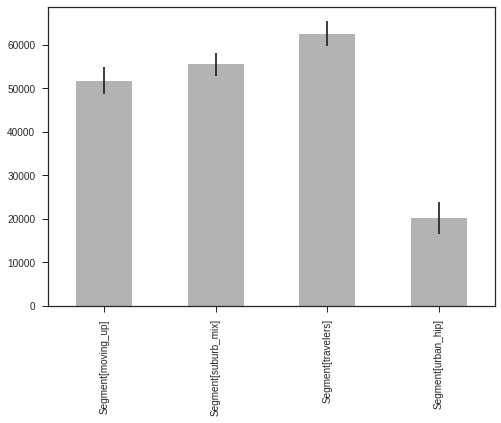

In [78]:
ci = income_segment_lm_adjusted.conf_int()
means.plot(kind='bar', yerr=ci[1]-means, color='0.7')

(0.0, 68000.0)

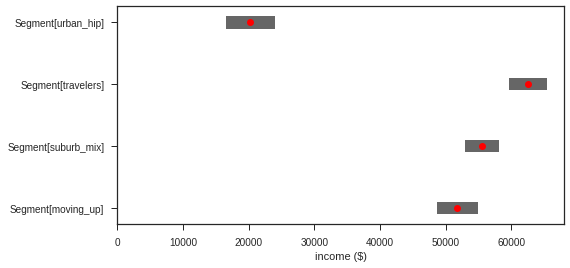

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.barh(y=range(4), left=ci[0], width=ci[1]-ci[0],
height=0.2, color='0.4')
plt.xlabel('income ($)')
plt.yticks(range(len(means)), ci.index)
plt.plot(means, range(4), 'ro')
plt.xlim((0, 68000))

In [82]:
def plot_confidence_intervals(centers, conf_ints, zero_line=False):
  '''Plot centers and confidence intervals'''
  plt.figure(figsize=(8,4))
  sort_index = np.argsort(centers.values)
  centers = centers[sort_index]
  conf_ints = conf_ints.iloc[sort_index]
  plt.barh(y=range(len(centers)), left=conf_ints[0],
  width=conf_ints[1]-conf_ints[0],
  height=0.2, color='0.4')
  plt.yticks(range(len(centers)), conf_ints.index)
  plt.plot(centers, range(len(centers)), 'ro')
  if zero_line:
    plt.plot([0,0],[-.5, len(centers) - 0.5], 'gray',
      linestyle='dashed')
  plt.xlim((-.05, 1.1 * conf_ints.iloc[:,1].max()))
  plt.ylim((-.5, len(centers) - 0.5))

**Reducing data complexity**

In [83]:
## Consumer Brand Rating Data 
import pandas as pd
brand_ratings = pd.read_csv('http://bit.ly/PMR-ch9')
brand_ratings.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [84]:
brand_ratings.describe().round(2)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,4.49,4.42,6.20,6.07,4.32,4.26,4.34,5.22,3.73
std,3.20,2.61,3.08,2.74,2.78,2.67,2.40,2.74,2.54
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,2.00,4.00,4.00,2.00,2.00,2.00,3.00,1.00
50%,4.00,4.00,7.00,6.00,4.00,4.00,4.00,5.00,3.00
75%,7.00,6.00,9.00,8.00,6.00,6.00,6.00,7.00,5.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


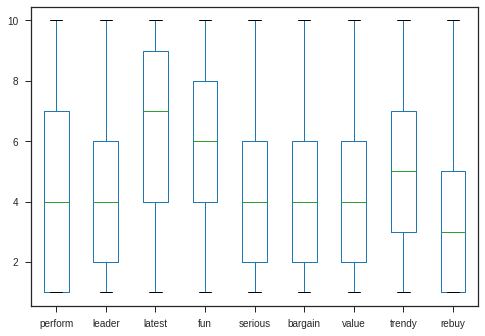

In [85]:
brand_ratings.plot.box()

In [86]:
## Rescaling the data 
import numpy as np
x = np.arange(1000)
x_sc = (x - x.mean())/x.std()
print('mean: {}\nmedian: {}\nmax: {}\nmin: {}'.format(x_sc.mean(),
np.median(x_sc),
x_sc.max(),
x_sc.min()))

mean: 0.0
median: 0.0
max: 1.7303196219213355
min: -1.7303196219213355


,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.09,-1.31,-1.69,-1.85,-1.20,-1.22,-1.39,-1.54,-1.07
25%,-1.09,-0.93,-0.71,-0.75,-0.84,-0.85,-0.97,-0.81,-1.07
50%,-0.15,-0.16,0.26,-0.02,-0.12,-0.10,-0.14,-0.08,-0.29
75%,0.78,0.61,0.91,0.70,0.60,0.65,0.69,0.65,0.50
max,1.72,2.14,1.24,1.43,2.04,2.15,2.36,1.74,2.47


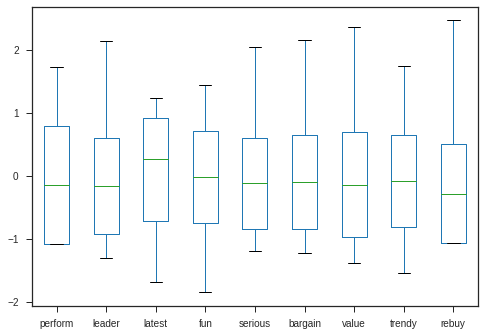

In [87]:
from sklearn.preprocessing import scale
brand_ratings_sc = brand_ratings.copy()
brand_ratings_sc.iloc[:, :-1] = scale(brand_ratings_sc.iloc[:, :-1])
brand_ratings_sc.plot.box()
brand_ratings_sc.describe().round(2)

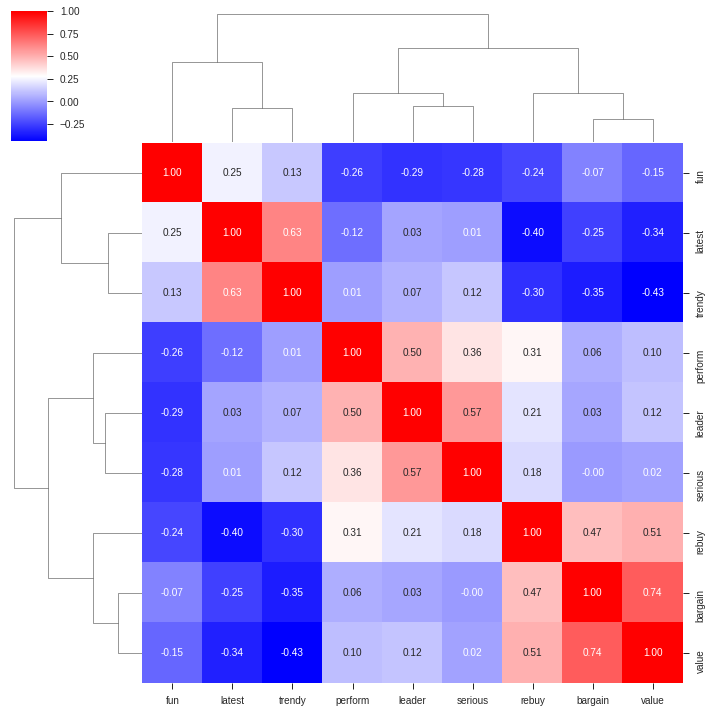

In [88]:
## Correlation Between Attributes
import matplotlib.pyplot as plt
import seaborn as sns
sns.clustermap(brand_ratings.corr(), annot=True, fmt=".2f",
cmap=plt.cm.bwr)



In [90]:
##  Aggregate Mean Ratings by Brand
brand_means = brand_ratings.groupby('brand').mean().round(3)
brand_means

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
b,7.47,7.21,8.43,3.40,7.61,4.37,4.70,7.25,4.33
c,6.57,7.45,5.88,3.75,7.72,2.64,3.28,5.29,3.39
d,2.31,2.87,7.28,6.58,2.40,1.91,2.10,7.24,2.47
e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82
f,4.30,5.12,2.31,5.47,5.96,6.59,6.79,2.99,7.18
g,7.43,3.98,2.24,4.65,2.84,6.65,7.35,1.72,7.19
h,4.44,3.64,7.74,8.03,3.93,2.29,2.46,7.59,2.19
i,5.56,3.58,7.29,7.20,3.91,3.58,2.41,6.84,3.21


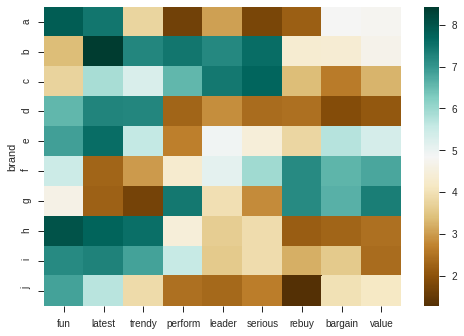

In [91]:
from matplotlib import cm
sns.heatmap(brand_means[['fun', 'latest', 'trendy', 'perform',
'leader', 'serious', 'rebuy', 'bargain',
'value']], cmap=cm.BrBG)

In [92]:
## PCA Example 
np.random.seed(98286)
xvar = np.random.randint(low=0, high=10, size=100)
yvar = xvar.copy()
yvar[:50] = np.random.randint(low=0, high=10, size=50)
zvar = yvar.copy()
zvar[25:75] = np.random.randint(low=0, high=10, size=50)
myvars = np.array([xvar, yvar, zvar])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


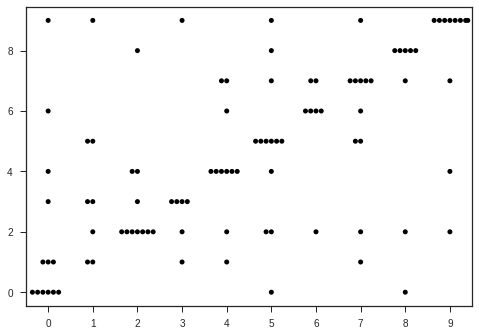

In [93]:
sns.swarmplot(x=xvar, y=yvar, color='k')

In [94]:
np.corrcoef(myvars)

array([[1.        , 0.5755755 , 0.23837089],
       [0.5755755 , 1.        , 0.48224687],
       [0.23837089, 0.48224687, 1.        ]])

In [95]:
from sklearn import decomposition
my_pca = decomposition.PCA().fit(myvars.T)

In [97]:
def pca_summary(pca, round_dig=3):

  return pd.DataFrame(
    [pca.explained_variance_,
    pca.explained_variance_ratio_,
    np.cumsum(pca.explained_variance_ratio_)],
    columns=['pc{}'.format(i) for i in
      range(1, 1+len(pca.explained_variance_))],
    index=['variance', 'proportion of variance explained',
      'cumulative proportion']
      ).round(round_dig)
pca_summary(my_pca)

,pc1,pc2,pc3
variance,16.473,7.050,3.042
proportion of variance explained,0.620,0.265,0.114
cumulative proportion,0.620,0.886,1.000


In [98]:
def pca_components(pca, variable_names):
  '''Return loading of variables on specific components in the PCA'''
  return pd.DataFrame(pca.components_,
      index=['pc{}'.format(i+1)
        for i in range(len(pca.components_))],
      columns=variable_names).T
my_pca_components = pca_components(my_pca, ['xvar', 'yvar', 'zvar'])
my_pca_components.round(3)

,pc1,pc2,pc3
xvar,-0.544,0.637,0.545
yvar,-0.622,0.129,-0.772
zvar,-0.563,-0.760,0.326


In [99]:
myvars_transformed = my_pca.transform(myvars.T)
np.corrcoef(myvars_transformed.T)

array([[1.00000000e+00, 1.36938301e-16, 3.98753086e-16],
       [1.36938301e-16, 1.00000000e+00, 7.27332599e-17],
       [3.98753086e-16, 7.27332599e-17, 1.00000000e+00]])

Text(0, 0.5, 'PC2')

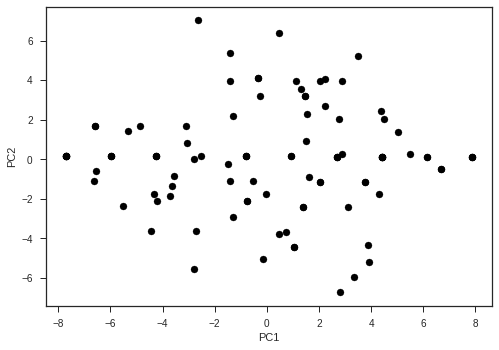

In [100]:
# Visualizing PCA 
import matplotlib.pyplot as plt
plt.scatter(x=myvars_transformed[:,0],
y=myvars_transformed[:,1],
color='k')
plt.xlabel('PC1')
plt.ylabel('PC2')

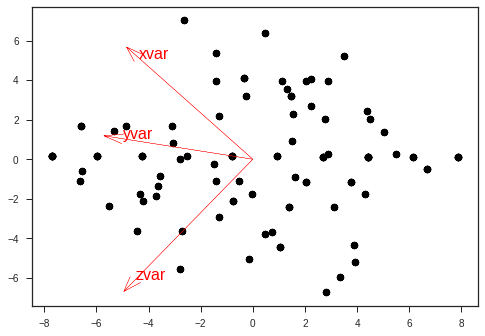

In [101]:
def plot_arrow_component(pca_components, variable, scale=1):
  '''Plot an arrow of component dimensions in PCA space'''
  plt.arrow(x=0, y=0,
      dx=pca_components.loc[variable]['pc1'] * scale,
      dy=pca_components.loc[variable]['pc2'] * scale,
      color='r',
      head_width=.5, overhang=1)
  plt.text(x=pca_components.loc[variable]['pc1'] * scale,
      y=pca_components.loc[variable]['pc2'] * scale,
      s=variable,
      color='r',
      fontsize=16)
  plt.scatter(x=myvars_transformed[:,0],
      y=myvars_transformed[:,1],
      color='k')
for v in my_pca_components.index:
  plot_arrow_component(my_pca_components, v, 8)

In [108]:
def biplot(values_transformed, pca_components, label=[]):
  '''Create a biplot, a scatterplot of points in PCA space with arrows
  representing the loadings of each variable.
  Points can optionally be labelled'''
  scale = 1.2* np.max(values_transformed[:,1])
  plt.figure(figsize=(10, 10))
  for v in pca_components.index:
    plot_arrow_component(pca_components, v, scale)
  plt.scatter(x=values_transformed[:,0],
      y=values_transformed[:,1],
      color='gray', s=4)
  if len(label) == values_transformed.shape[0]:
    for i, txt in enumerate(label):
      plt.text(s=txt,
        x=values_transformed[i,0]+.01*scale,
        y=values_transformed[i,1]+.01*scale,
        fontsize=14)
  plt.xlabel('PC1')
  plt.ylabel('PC2')

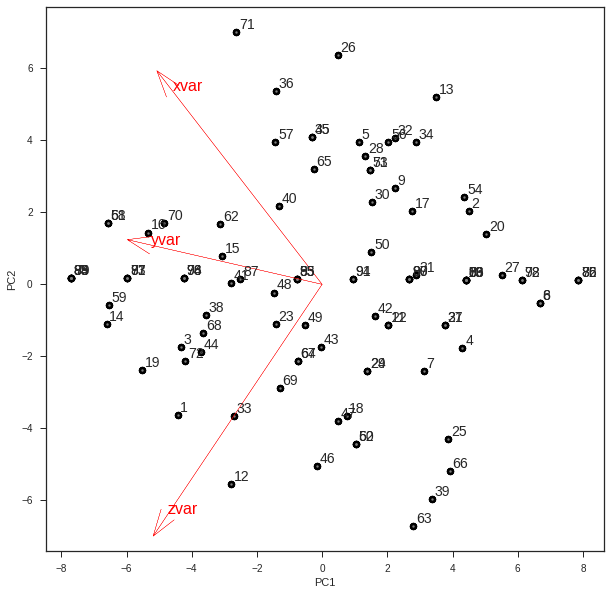

In [109]:
biplot(myvars_transformed, my_pca_components,
label=range(myvars.shape[1]))

In [103]:
## PCA for Brand Rating 
brand_rating_names = brand_ratings_sc.columns[:-1]
brand_ratings_sc_vals = brand_ratings_sc[brand_rating_names]
brand_pca = decomposition.PCA().fit(brand_ratings_sc_vals)
pca_summary(brand_pca)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
variance,2.982,2.099,1.080,0.728,0.638,0.535,0.390,0.312,0.243
proportion of variance explained,0.331,0.233,0.120,0.081,0.071,0.059,0.043,0.035,0.027
cumulative proportion,0.331,0.564,0.684,0.765,0.836,0.895,0.938,0.973,1.000


Text(0, 0.5, 'Variance')

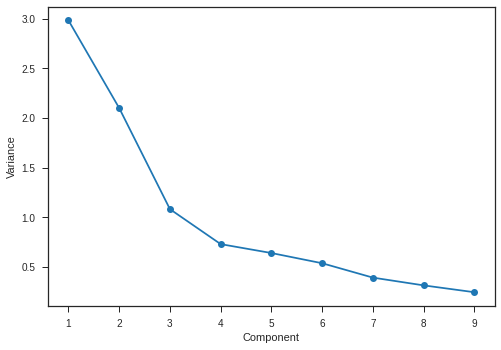

In [104]:
plt.plot(1+np.arange(len(brand_pca.explained_variance_)),
brand_pca.explained_variance_, 'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

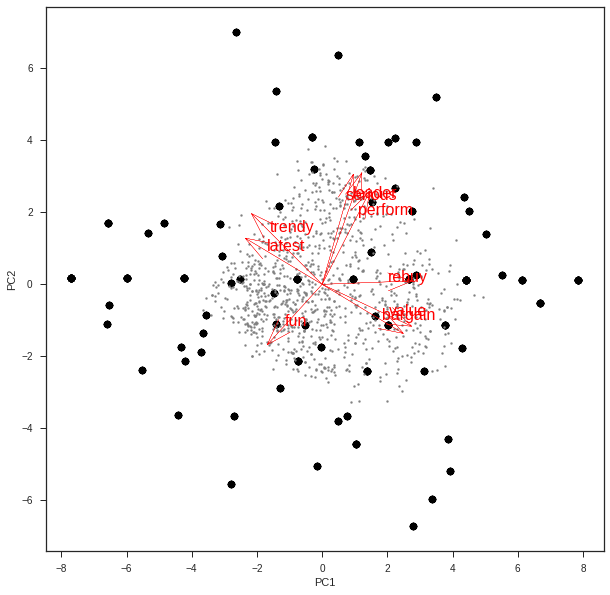

In [110]:
brand_ratings_sc_trans = brand_pca.transform(brand_ratings_sc_vals)
brand_pca_components = pca_components(brand_pca, brand_rating_names)
biplot(brand_ratings_sc_trans, brand_pca_components)

In [106]:
## Perceptional Map of the brands 
brand_means_sc = brand_ratings_sc.groupby('brand').mean()
brand_means_sc.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,-0.886362,-0.528168,0.411179,0.656974,-0.919400,0.214203,0.184785,-0.525407,-0.596465
b,0.931336,1.071294,0.726470,-0.972701,1.183733,0.041640,0.151415,0.740679,0.237092
c,0.650249,1.163350,-0.102388,-0.845098,1.223346,-0.607347,-0.440898,0.025541,-0.132504
d,-0.680231,-0.593373,0.352671,0.186665,-0.692521,-0.881197,-0.933102,0.737030,-0.494236
e,-0.564673,0.192933,0.456685,0.296039,0.042135,0.551826,0.418373,0.138649,0.036566


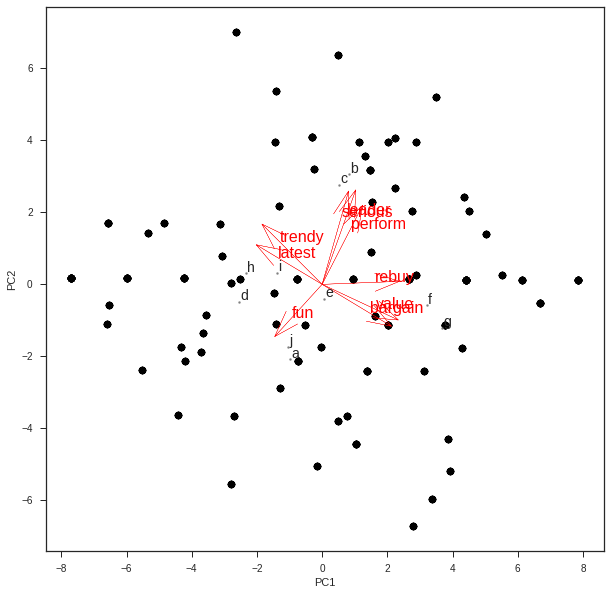

In [111]:
brand_means_sc = (
((brand_means_sc - brand_means_sc.mean()) / brand_means_sc.std()))
brand_means_sc_transformed = brand_pca.transform(brand_means_sc)
biplot(brand_means_sc_transformed, brand_pca_components,
label=brand_means.index)

In [113]:
brand_means_sc.loc['c'] - brand_means_sc.loc['e']
brand_means_sc.loc[['b','c','f','g']].mean(axis=0) - brand_means_sc.loc['e']

perform    1.717172
leader     0.580749
latest    -1.299004
fun       -1.544598
serious    0.750005
bargain   -0.391245
value      0.104383
trendy    -0.629646
rebuy      0.840802
dtype: float64

In [114]:
##Exploratory Factor Analysis

np.linalg.eig(np.corrcoef(brand_ratings_sc_vals.T))[0]


array([2.97929556, 2.09655168, 1.07925487, 0.72721099, 0.63754592,
       0.53484323, 0.39010444, 0.24314689, 0.31204642])

In [117]:
import factor_analyzer
fa = factor_analyzer.FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(brand_ratings_sc_vals)
pd.DataFrame(fa.loadings_, index=brand_rating_names).round(2)

,0,1
perform,0.09,0.60
leader,-0.02,0.81
latest,-0.59,-0.04
fun,-0.19,-0.39
serious,-0.07,0.68
bargain,0.69,0.05
value,0.78,0.11
trendy,-0.65,0.10
rebuy,0.60,0.33


In [118]:
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(brand_ratings_sc_vals)
pd.DataFrame(fa.loadings_, index=brand_rating_names).round(2)

,0,1,2
perform,0.07,0.60,-0.06
leader,0.06,0.80,0.10
latest,-0.16,-0.08,0.98
fun,-0.07,-0.41,0.21
serious,-0.01,0.68,0.08
bargain,0.84,-0.00,-0.11
value,0.85,0.08,-0.21
trendy,-0.35,0.08,0.59
rebuy,0.50,0.32,-0.30


In [119]:
## EFA Rotations
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='oblimin')
fa.fit(brand_ratings_sc_vals)
fa_loadings_df = pd.DataFrame(fa.loadings_,
index=brand_rating_names)
fa_loadings_df.round(2)

,0,1,2
perform,0.01,0.60,-0.09
leader,0.02,0.81,0.07
latest,0.03,-0.00,1.01
fun,0.00,-0.39,0.24
serious,-0.05,0.68,0.03
bargain,0.88,-0.05,0.07
value,0.86,0.03,-0.04
trendy,-0.26,0.14,0.54
rebuy,0.45,0.28,-0.22


In [120]:
np.corrcoef(fa.transform(brand_ratings_sc_vals).T)

array([[ 1.        ,  0.12904599, -0.41410012],
       [ 0.12904599,  1.        , -0.04888392],
       [-0.41410012, -0.04888392,  1.        ]])

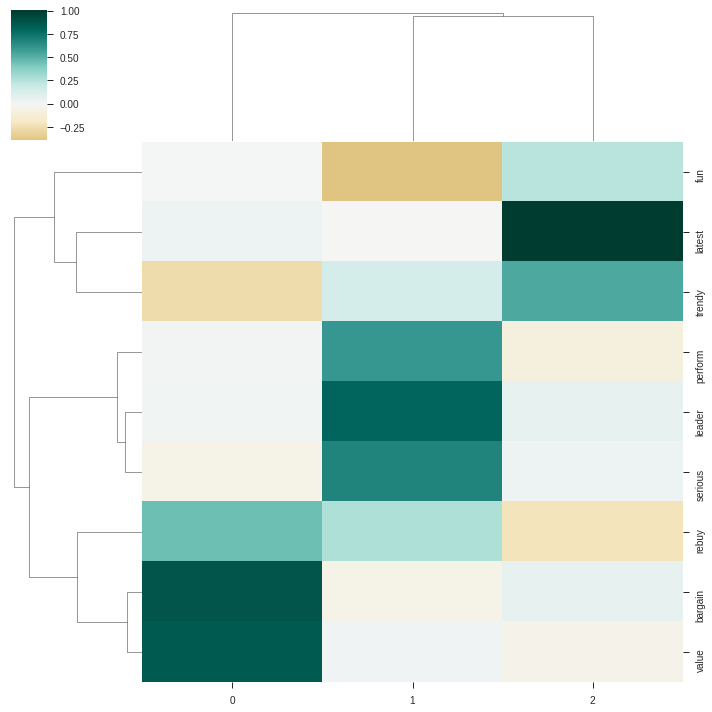

In [121]:
sns.clustermap(fa_loadings_df, cmap=cm.BrBG, center=0)

In [123]:
## Uisng factor scores for brands 
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='oblimin')
brand_ratings_fa_trans = fa.fit_transform(brand_ratings_sc_vals)
brand_rating_fa_scores = pd.DataFrame(brand_ratings_fa_trans)
brand_rating_fa_scores['brand'] = brand_ratings_sc.brand
print(brand_rating_fa_scores.head())

brand_rating_fa_mean = brand_rating_fa_scores.groupby('brand').mean()
brand_rating_fa_mean.columns = ['Value', 'Leader', 'Latest']
brand_rating_fa_mean.round(3)

          0         1         2 brand
0  1.388590 -0.491354  0.531693     a
1 -1.188916 -1.352280 -0.658905     a
2  1.038597 -0.801256 -0.372207     a
3  0.037803 -0.318029  1.190962     a
4  1.688281 -1.525753 -0.453958     a


,Value,Leader,Latest
brand,,,
a,0.147,-0.863,0.388
b,0.067,1.205,0.710
c,-0.492,1.120,-0.077
d,-0.921,-0.625,0.368
e,0.416,-0.035,0.437
f,1.048,0.406,-1.265
g,1.236,0.086,-1.326
h,-0.804,-0.271,0.528
i,-0.555,-0.169,0.388


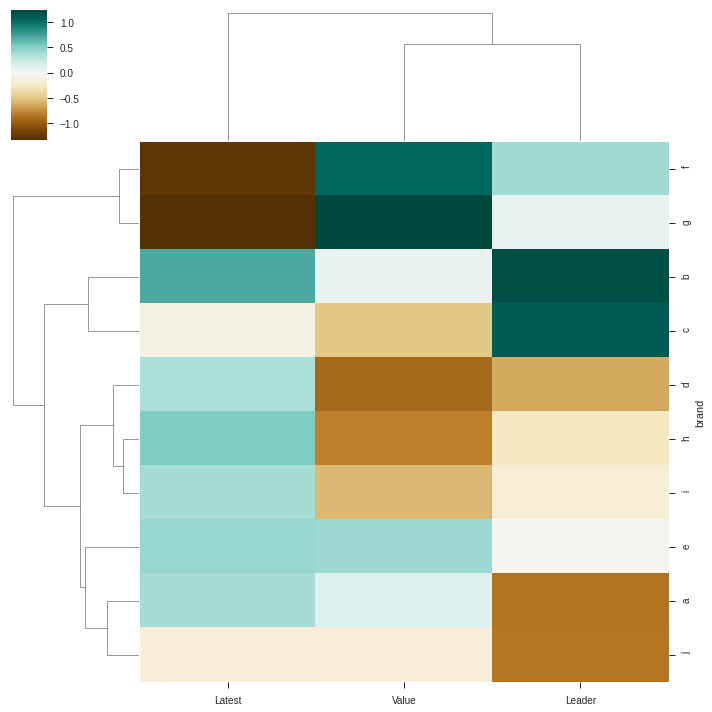

In [124]:
sns.clustermap(brand_rating_fa_mean, cmap=cm.BrBG, center=0)

In [125]:
## Multidimensional scaling 
from sklearn import manifold
np.random.seed(889783)
brand_mds = manifold.MDS().fit_transform(brand_means)
brand_mds

array([[ 0.59217926,  5.19146726],
       [-2.74412002, -6.30675543],
       [-0.51645595, -5.64921129],
       [-4.33444294,  3.51765049],
       [ 0.69182752,  0.80286252],
       [ 6.14100233, -2.84581818],
       [ 8.40903503, -0.33459353],
       [-4.67731306,  1.14429619],
       [-3.16204417,  0.12390567],
       [-0.399668  ,  4.35619632]])

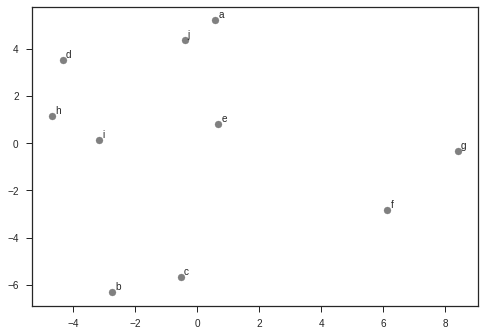

In [127]:
plt.scatter(x=brand_mds[:,0],
y=brand_mds[:,1],
color='grey')
for i,p in enumerate(brand_mds):

  plt.annotate(s=brand_means.index[i], xy=p+.1)

In [128]:
brand_ranks = brand_means.apply(lambda col: col.argsort().argsort())
brand_ranks

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,0,2,6,8,0,6,6,2,2
b,9,8,9,0,8,5,5,8,7
c,7,9,3,1,9,2,3,4,5
d,1,1,4,4,1,0,0,7,3
e,3,6,7,6,6,7,7,5,6
f,4,7,1,3,7,8,8,1,8
g,8,5,0,2,3,9,9,0,9
h,5,4,8,9,5,1,2,9,1
i,6,3,5,7,4,3,1,6,4


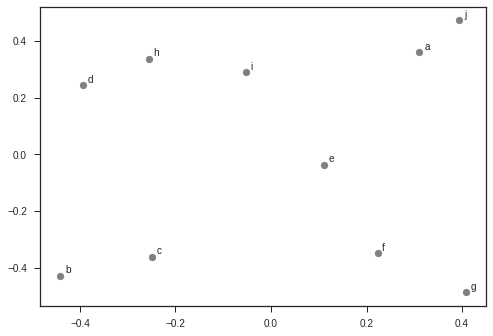

In [129]:
brand_mds_nonmetric = manifold.MDS(metric=False).fit_transform(brand_ranks)
plt.scatter(x=brand_mds_nonmetric[:,0],
y=brand_mds_nonmetric[:,1],
color='grey')
for i,p in enumerate(brand_mds_nonmetric):
  plt.annotate(s=brand_means.index[i], xy=p+.01)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


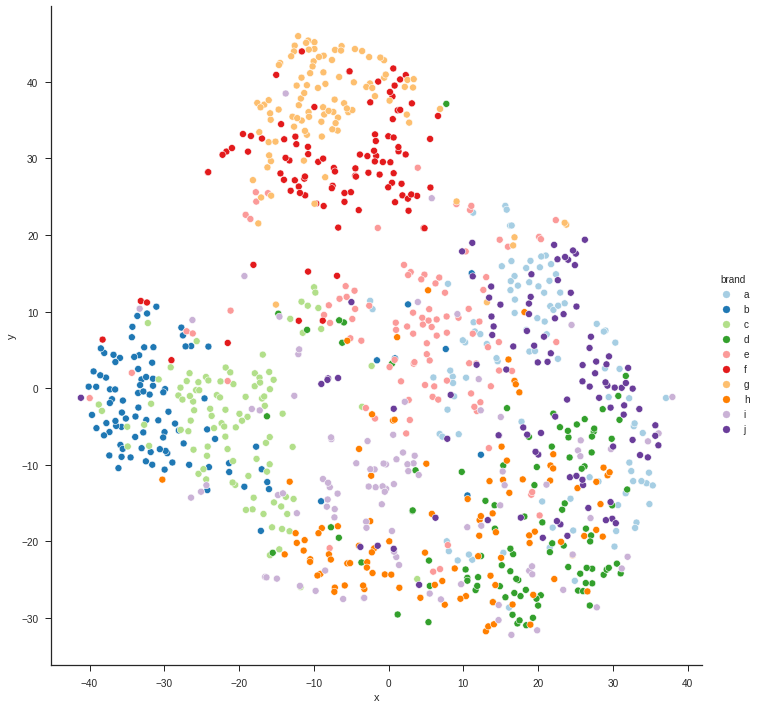

In [130]:
#Visualization Using Low-Dimensional Embeddings
#t-SNE
brand_tsne = manifold.TSNE().fit_transform(brand_ratings_sc_vals)
brand_tsne_df = pd.DataFrame(brand_tsne, columns=['x', 'y'])
brand_tsne_df['brand'] = brand_ratings_sc.brand

sns.pairplot(brand_tsne_df, x_vars=['x'], y_vars=['y'],
hue='brand', size=10,
palette=sns.color_palette('Paired', n_colors=10))


In [133]:
## UMAP
import umap
brand_embedding = umap.UMAP().fit_transform(brand_ratings_sc_vals)
brand_umap_df = pd.DataFrame(brand_embedding, columns=['x', 'y'])
brand_umap_df['brand'] = brand_ratings_sc.brand

sns.pairplot(brand_umap_df, x_vars=['x'], y_vars=['y'],
hue='brand', size=10,
palette=sns.color_palette('Paired', n_colors=10))

AttributeError: ignored

**Segmentation: Unsupervised Clustering Methods**

In [134]:
import pandas as pd
seg_df = pd.read_csv('http://bit.ly/PMR-ch5')
seg_df.head()


,Segment,age,gender,income,kids,own_home,subscribe
0,travelers,60.794945,male,57014.537526,0,True,False
1,travelers,61.764535,female,43796.941252,0,False,False
2,travelers,47.493356,male,51095.344683,0,True,False
3,travelers,60.963694,male,56457.722237,0,True,True
4,travelers,60.594199,female,103020.070798,0,True,False


In [137]:
#clustering 


## transforming and scaling the data 
from sklearn import preprocessing
seg_df['is_female'] = seg_df.gender == 'female'
seg_sub = seg_df.drop(['Segment', 'gender'], axis=1)


seg_sc = pd.DataFrame(preprocessing.scale(seg_sub),
columns=seg_sub.columns)
seg_sc.head()

,age,income,kids,own_home,subscribe,is_female
0,1.551729,0.328689,-0.902199,1.120553,-0.363422,-0.960769
1,1.627442,-0.356010,-0.902199,-0.892416,-0.363422,1.040833
2,0.513037,0.022062,-0.902199,1.120553,-0.363422,-0.960769
3,1.564906,0.299844,-0.902199,1.120553,2.751623,-0.960769
4,1.536053,2.711871,-0.902199,1.120553,-0.363422,1.040833


In [138]:
pd.pivot_table(seg_sub, index=seg_df.Segment)

,age,income,is_female,kids,own_home,subscribe
Segment,,,,,,
moving_up,36.216087,51763.552666,0.700,1.857143,0.357143,0.214286
suburb_mix,39.284730,55552.282925,0.530,1.950000,0.480000,0.070000
travelers,57.746500,62609.655328,0.325,0.000000,0.662500,0.025000
urban_hip,23.873716,20267.737317,0.320,1.140000,0.140000,0.220000


In [139]:
import numpy as np
# Output not shown
pd.pivot_table(seg_sub, index=seg_df.Segment,
aggfunc=[np.mean, np.std]).unstack()

pd.pivot_table(seg_sub, index=seg_df.Segment,
aggfunc=lambda x: np.percentile(x, 95))

,age,income,is_female,kids,own_home,subscribe
Segment,,,,,,
moving_up,43.273817,63948.927421,True,4.55,True,True
suburb_mix,47.476484,74814.773225,True,4.05,True,True
travelers,73.252981,96231.113850,True,0.00,True,False
urban_hip,26.871298,27540.504213,True,2.55,True,True


In [140]:
def check_clusters(data, labels):
  return pd.pivot_table(data,
    index=labels)
# Output not shown
check_clusters(seg_sub, seg_df.Segment)

,age,income,is_female,kids,own_home,subscribe
Segment,,,,,,
moving_up,36.216087,51763.552666,0.700,1.857143,0.357143,0.214286
suburb_mix,39.284730,55552.282925,0.530,1.950000,0.480000,0.070000
travelers,57.746500,62609.655328,0.325,0.000000,0.662500,0.025000
urban_hip,23.873716,20267.737317,0.320,1.140000,0.140000,0.220000


In [141]:
## hierarchical clustering 

# Vector of differences
np.array([1, 2, 3]) - np.array([2, 3, 2])
# Sum of the squared distances
np.sum((np.array([1, 2, 3]) - np.array([2, 3, 2]))**2)

# Root sum of the squared distances
np.sqrt(np.sum((np.array([1, 2, 3]) - np.array([2, 3, 2]))**2))


1.7320508075688772

In [142]:
from scipy.spatial import distance
distance.pdist([np.array([1, 2, 3]), np.array([2, 3, 2])])

array([1.73205081])

In [143]:
distance.squareform(distance.pdist(seg_sc.iloc[:3]))

array([[0.        , 2.92113022, 1.08300539],
       [2.92113022, 0.        , 3.07299428],
       [1.08300539, 3.07299428, 0.        ]])

In [144]:
distance.pdist(seg_sc.iloc[:3])

array([2.92113022, 1.08300539, 3.07299428])

Text(0, 0.5, 'Count')

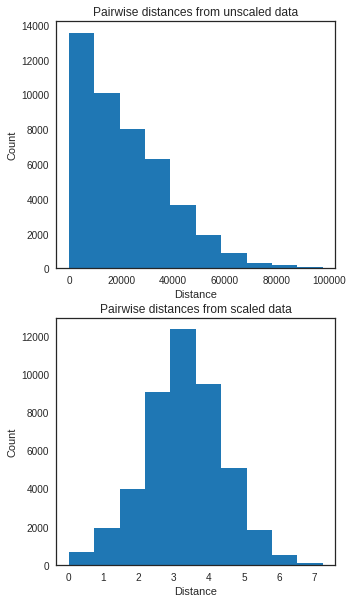

In [145]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.hist(distance.pdist(seg_sub))
plt.title('Pairwise distances from unscaled data')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.subplot(2,1,2)
plt.hist(distance.pdist(seg_sc))
plt.title('Pairwise distances from scaled data')
plt.xlabel('Distance')
plt.ylabel('Count')

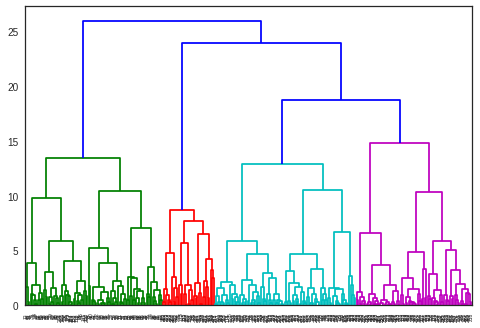

In [147]:
from scipy.cluster import hierarchy
linkages = hierarchy.linkage(seg_sc, method='ward')
hierarchy.dendrogram(linkages)
plt.show()


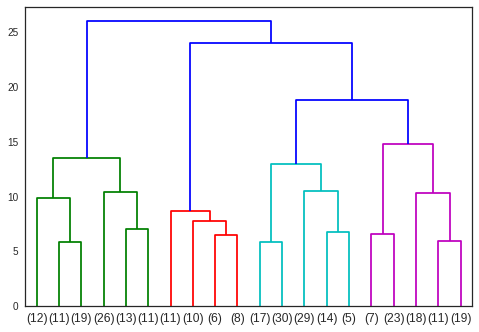

In [148]:
hierarchy.dendrogram(linkages, orientation='top',
truncate_mode='lastp', p=20)
plt.show()

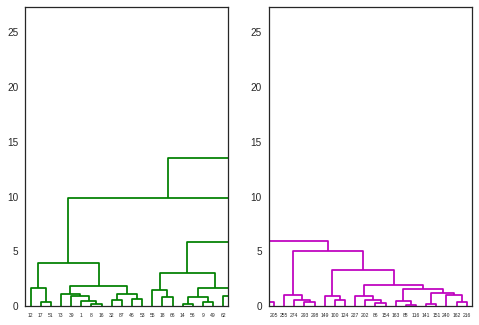

In [149]:
plt.subplot(1,2,1)
hierarchy.dendrogram(linkages, leaf_rotation=0)
plt.xlim((0,200))
plt.subplot(1,2,2)
hierarchy.dendrogram(linkages, leaf_rotation=0)
plt.xlim((2800, 3000))
plt.show()

In [150]:
# Similar
seg_sub.loc[[17, 51]]

,age,income,kids,own_home,subscribe,is_female
17,73.266707,70157.058678,0,False,False,True
51,71.172291,75554.353842,0,False,False,True


In [151]:
# Similar
seg_sub.loc[[163, 88]]

,age,income,kids,own_home,subscribe,is_female
163,39.653607,48996.400976,2,True,False,False
88,40.106702,41744.977842,2,True,False,False


In [152]:
# Dissimilar
seg_sub.loc[[17,163]]

,age,income,kids,own_home,subscribe,is_female
17,73.266707,70157.058678,0,False,False,True
163,39.653607,48996.400976,2,True,False,False


In [153]:
hierarchy.cophenet(linkages, distance.pdist(seg_sc))[0]

0.5985290160084774

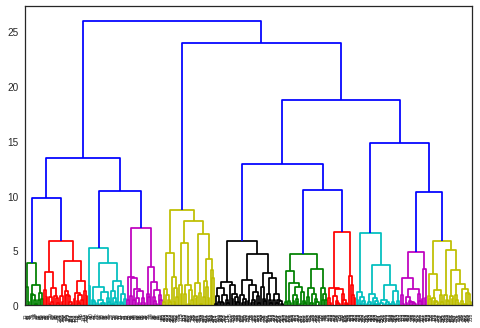

In [154]:
# Not shown
hierarchy.dendrogram(linkages, color_threshold=9)
plt.show()

In [155]:
labels = hierarchy.fcluster(linkages, t=4, criterion='maxclust')
list(zip(*np.unique(labels, return_counts=True)))

[(1, 92), (2, 35), (3, 95), (4, 78)]

In [156]:
check_clusters(seg_sub, labels)

,age,income,is_female,kids,own_home,subscribe
1,54.474706,63219.658293,0.250000,0.152174,0.521739,0.0
2,34.523881,41685.199147,0.542857,1.514286,0.314286,1.0
3,38.204641,51578.802282,1.000000,1.873684,0.463158,0.0
4,31.122503,38790.506683,0.089744,1.756410,0.384615,0.0


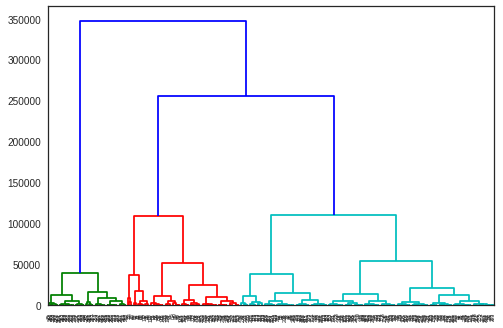

In [157]:
linkages_unscaled = hierarchy.linkage(seg_sub, method='ward')
hierarchy.dendrogram(linkages_unscaled)
plt.show()

In [158]:
labels_unscaled = hierarchy.fcluster(linkages_unscaled, t=3,
criterion='maxclust')
check_clusters(seg_sub, labels_unscaled)

,age,income,is_female,kids,own_home,subscribe
1,26.238778,20026.508497,0.320755,1.113208,0.150943,0.207547
2,48.102952,74464.263260,0.394737,1.052632,0.500000,0.052632
3,42.283774,49591.504755,0.567251,1.421053,0.508772,0.116959


In [159]:
def cluster_plot_raw(x, y, labels):
  for l in np.unique(labels):
    idx = labels == l
    plt.scatter(x[idx],
    y[idx],
    label=l)
  plt.legend()
  plt.xlabel(x.name)
  plt.ylabel(y.name)

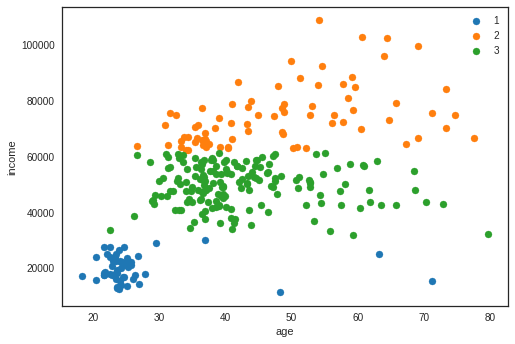

In [160]:
cluster_plot_raw(seg_sub.age, seg_sub.income, labels_unscaled)

In [161]:
##Mean-Based Clustering: k_means()

def check_clusters(data, labels):
  print(list(zip(*np.unique(labels, return_counts=True))))
  return pd.pivot_table(data,
    index=labels)

In [162]:
import numpy as np
from sklearn import cluster
np.random.seed(536)
centroids, labels, inertia = cluster.k_means(seg_sc, n_clusters=4)
check_clusters(seg_sub, labels)

[(0, 73), (1, 101), (2, 91), (3, 35)]


,age,income,is_female,kids,own_home,subscribe
0,31.672851,39921.012710,0.000000,1.821918,0.315068,0.0
1,37.043120,49285.905471,1.000000,1.811881,0.405941,0.0
2,55.112042,64282.900228,0.263736,0.142857,0.637363,0.0
3,34.523881,41685.199147,0.542857,1.514286,0.314286,1.0


In [163]:
centroids, k_labels_unscaled4, inertia = cluster.k_means(seg_sub,
n_clusters=4)
check_clusters(seg_sub, k_labels_unscaled4)

[(0, 96), (1, 55), (2, 42), (3, 107)]


,age,income,is_female,kids,own_home,subscribe
0,42.346106,60157.505981,0.541667,1.625000,0.447917,0.093750
1,27.809087,20457.938690,0.327273,1.072727,0.163636,0.200000
2,52.117381,81545.927332,0.309524,0.476190,0.571429,0.023810
3,41.993915,45566.356272,0.570093,1.373832,0.532710,0.130841


In [164]:
centroids, k_labels_unscaled3, inertia = cluster.k_means(seg_sub,
n_clusters=3)
check_clusters(seg_sub, k_labels_unscaled3)

[(0, 64), (1, 65), (2, 171)]


,age,income,is_female,kids,own_home,subscribe
0,29.635597,22520.530838,0.343750,1.109375,0.171875,0.187500
1,49.494653,76393.497749,0.384615,0.923077,0.507692,0.046154
2,41.889908,51426.578619,0.567251,1.467836,0.520468,0.116959


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

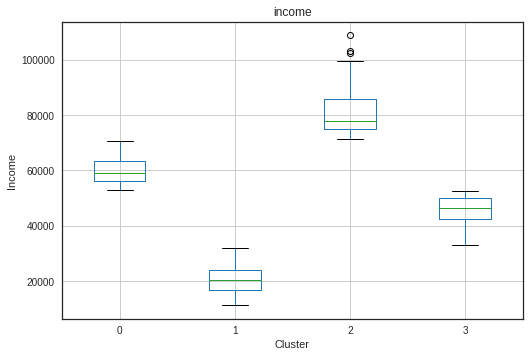

In [165]:
import matplotlib.pyplot as plt
seg_sub.boxplot(column='income', by=k_labels_unscaled4)
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.suptitle('')

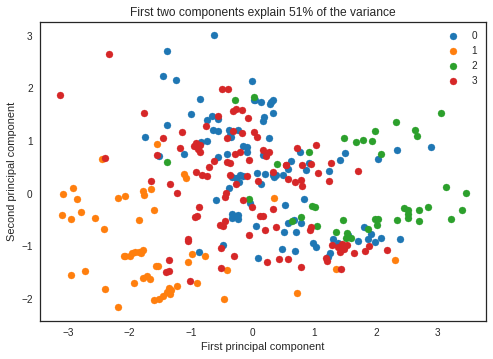

In [166]:
from sklearn import decomposition
from matplotlib import cm
def cluster_plot(data_df, labels):
  p = decomposition.PCA(random_state=132, svd_solver='full')
  scaled_transformed = p.fit_transform(preprocessing.scale(data_df))
  for l in np.unique(labels):
    idx = np.where(labels == l)[0]
    plt.scatter(scaled_transformed[idx, 0],
      scaled_transformed[idx, 1],
      label=l)
  plt.legend()
  plt.title('First two components explain {}% of the variance'
    .format(round(100*p.explained_variance_ratio_[:2].sum())))
  plt.xlabel('First principal component')
  plt.ylabel('Second principal component')
cluster_plot(seg_sub, k_labels_unscaled4)

In [167]:
##Model-Based Clustering: GaussianMixture()

from sklearn import mixture
gmm4 = mixture.GaussianMixture(n_components=4,
covariance_type='full',
random_state=323).fit(seg_sub)
gmm4_labels = gmm4.predict(seg_sub)
gmm4.bic(seg_sub)


7892.760423308931

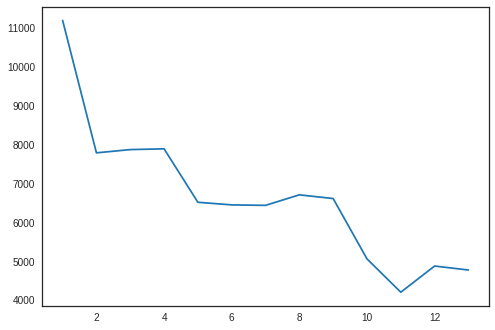

In [168]:
gmm_n_test = [mixture.GaussianMixture(n_components=n,
covariance_type='full',
random_state=323)
.fit(seg_sub) for n in range(1,14)]
plt.plot(range(1, 14), [g.bic(seg_sub) for g in gmm_n_test])

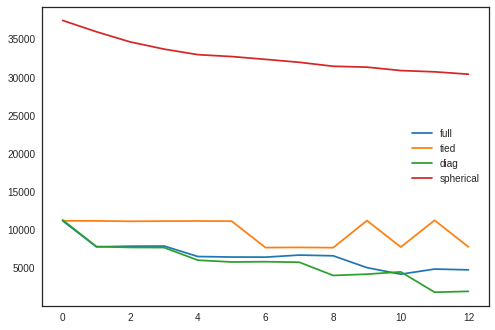

In [169]:
gmm_n_v_test = {v: [mixture.GaussianMixture(n_components=n,
covariance_type=v,
random_state=323)
.fit(seg_sub) for n in range(1,14)]
for v in ['full', 'tied', 'diag', 'spherical']}
gmm_n_v_test_bic = {v: [g.bic(seg_sub) for g in m]
for v, m in gmm_n_v_test.items()}
pd.DataFrame(gmm_n_v_test_bic).plot()

In [170]:
gmm5 = mixture.GaussianMixture(n_components=5,
covariance_type='diag',random_state=323).fit(seg_sub)
gmm5_labels = gmm5.predict(seg_sub)

**Classification: Assigning Observations to Known Categories**

In [171]:
#Naive Bayes Classification: GaussianNB()

import pandas as pd
seg_df = pd.read_csv('http://bit.ly/PMR-ch5')
seg_df['is_female'] = seg_df.gender == 'female'
seg_sub = seg_df.drop(['Segment', 'gender'], axis=1)
seg_sub.head()


,age,income,kids,own_home,subscribe,is_female
0,60.794945,57014.537526,0,True,False,False
1,61.764535,43796.941252,0,False,False,True
2,47.493356,51095.344683,0,True,False,False
3,60.963694,56457.722237,0,True,True,False
4,60.594199,103020.070798,0,True,False,True


In [172]:
import numpy as np
seg_labels = seg_df.Segment
np.random.seed(537)
rand_idx = np.random.rand(seg_labels.shape[0])
train_idx = rand_idx <= 0.7
test_idx = rand_idx > 0.7
X_train = seg_sub.iloc[train_idx]
X_test = seg_sub.iloc[test_idx]
y_train = seg_labels.iloc[train_idx]
y_test = seg_labels.iloc[test_idx]

In [173]:
from sklearn import naive_bayes
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
list(zip(nb.classes_, nb.class_prior_))

[('moving_up', 0.27102803738317754),
 ('suburb_mix', 0.32242990654205606),
 ('travelers', 0.2523364485981308),
 ('urban_hip', 0.1542056074766355)]

In [174]:
predictions = nb.predict(seg_sub)
seg_sub_pred = seg_sub.copy()
seg_sub_pred['prediction'] = predictions
seg_sub_pred['true_segment'] = seg_df['Segment']
seg_sub_pred.sample(5)

,age,income,kids,own_home,subscribe,is_female,prediction,true_segment
183,32.806946,60752.625106,5,False,False,True,moving_up,moving_up
194,43.302666,71789.130948,1,False,False,False,suburb_mix,moving_up
201,34.294615,62236.114534,5,False,False,False,moving_up,moving_up
99,31.673893,75433.895743,3,True,False,False,suburb_mix,suburb_mix
10,79.650722,32013.086824,0,True,False,False,travelers,travelers


In [175]:
nb.score(X_test, y_test)

0.8488372093023255

In [176]:
from sklearn import metrics
y_pred = nb.predict(X_test)
metrics.f1_score(y_true=y_test, y_pred=y_pred, average='weighted')

0.8532809445929236

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, model):
  conf_mat = metrics.confusion_matrix(y_true, y_pred)
  sns.heatmap(conf_mat.T,
    xticklabels=model.classes_, yticklabels=model.classes_,
    annot=True, fmt='d')
  plt.xlabel('true label')
  plt.ylabel('predicted label')

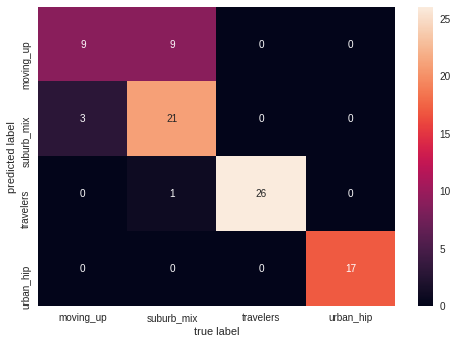

In [179]:
confusion_matrix(y_test, y_pred, nb)

In [180]:
def return_precision_recall(y_true, y_pred, model):
  conf_mat = metrics.confusion_matrix(y_true, y_pred)
  precision = pd.Series(metrics.precision_score(y_test,
    y_pred,
    average=None),
      index=model.classes_)
  recall = pd.Series(metrics.recall_score(y_test,
    y_pred,
    average=None),
      index=model.classes_)
  f1 = pd.Series(2 * (precision * recall)/(precision + recall),
    index=model.classes_)
  return pd.DataFrame([precision, recall, f1], index=['precision',
    'recall', 'f1'])

In [181]:
return_precision_recall(y_test, y_pred, nb)

,moving_up,suburb_mix,travelers,urban_hip
precision,0.50,0.875000,0.962963,1.0
recall,0.75,0.677419,1.000000,1.0
f1,0.60,0.763636,0.981132,1.0


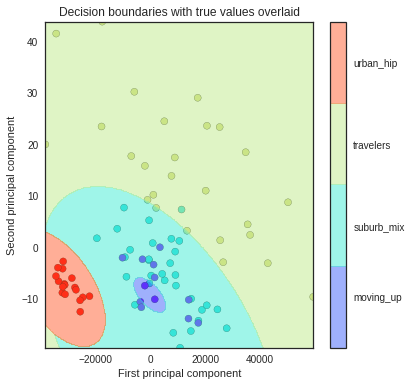

In [182]:
from sklearn import clone, decomposition
def plot_decision_pca(model, X, y):
  width, height = 500, 500
  # Transform the X values using a PCA
  p = decomposition.PCA(random_state=132, svd_solver='full')
  X_transformed = p.fit_transform(X.iloc[:,:2])
  # Pull the first two dimensions
  x0 = X_transformed[:, 0]
  x1 = X_transformed[:, 1]
  # Get evenly spaced values between the min and max values
  x0_g = np.linspace(x0.min(), x0.max(), width)
  x1_g = np.linspace(x1.min(), x1.max(), height)
  # Create a "grid" of those evenly spaced values from each vector
  xx, yy = np.meshgrid(x0_g, x1_g)
  # Stack together all of the sampled values
  X_grid_transformed = np.vstack([xx.ravel(), yy.ravel()]).T
  # Do the inverse transform to get the non-PCA transformed values
  X_grid = p.inverse_transform(X_grid_transformed)
  # Fit a clone of the model using use inverse transformed columns
  # From the first two PCA dimensions.
  # Predict values on the sampled values
  model_c = clone(model)
  model_c.fit(p.inverse_transform(np.vstack([x0, x1]).T), y)
  X_grid_labels = model_c.predict(X_grid)
  # Create a class mapper to map from class string to an integer
  class_mapper = {class_:i for i,class_ in enumerate(model.classes_)}
  plt.figure(figsize=(6,6))
  # Plot the predicted values
  a = plt.scatter(x0, x1,
    c=[class_mapper[label] for label in y],
    cmap=plt.cm.rainbow, edgecolor='k', vmin=0, vmax=3)
  plt.contourf(xx, yy,
    np.reshape([class_mapper[label]
      for label in X_grid_labels],
      (width, height)),
    cmap=a.cmap, alpha=0.5, levels=3)
  cb = plt.colorbar(ticks=[0.5, 1.2, 2, 2.8])
  _ = cb.ax.set_yticklabels(model.classes_)
  plt.title('Decision boundaries with true values overlaid')
  plt.xlabel('First principal component')
  plt.ylabel('Second principal component')
plot_decision_pca(nb,X_test,y_test)

In [183]:
##Random Forest Classification: RandomForestClassifier()

from sklearn import ensemble
np.random.seed(23432)
rf = ensemble.RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
rf.score(X_test, y_test)

0.7558139534883721

In [185]:
y_pred = rf.predict(X_test)
metrics.f1_score(y_test, y_pred, average='micro')

0.755813953488372

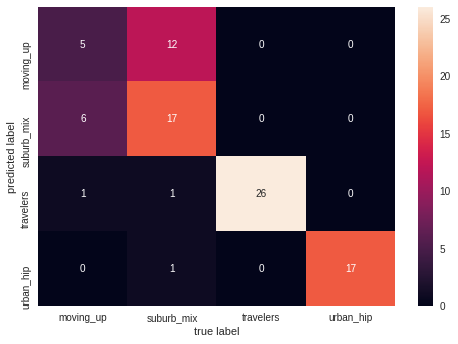

In [186]:
confusion_matrix(y_test, y_pred, rf)

In [187]:
return_precision_recall(y_test, y_pred, rf)

,moving_up,suburb_mix,travelers,urban_hip
precision,0.294118,0.739130,0.928571,0.944444
recall,0.416667,0.548387,1.000000,1.000000
f1,0.344828,0.629630,0.962963,0.971429


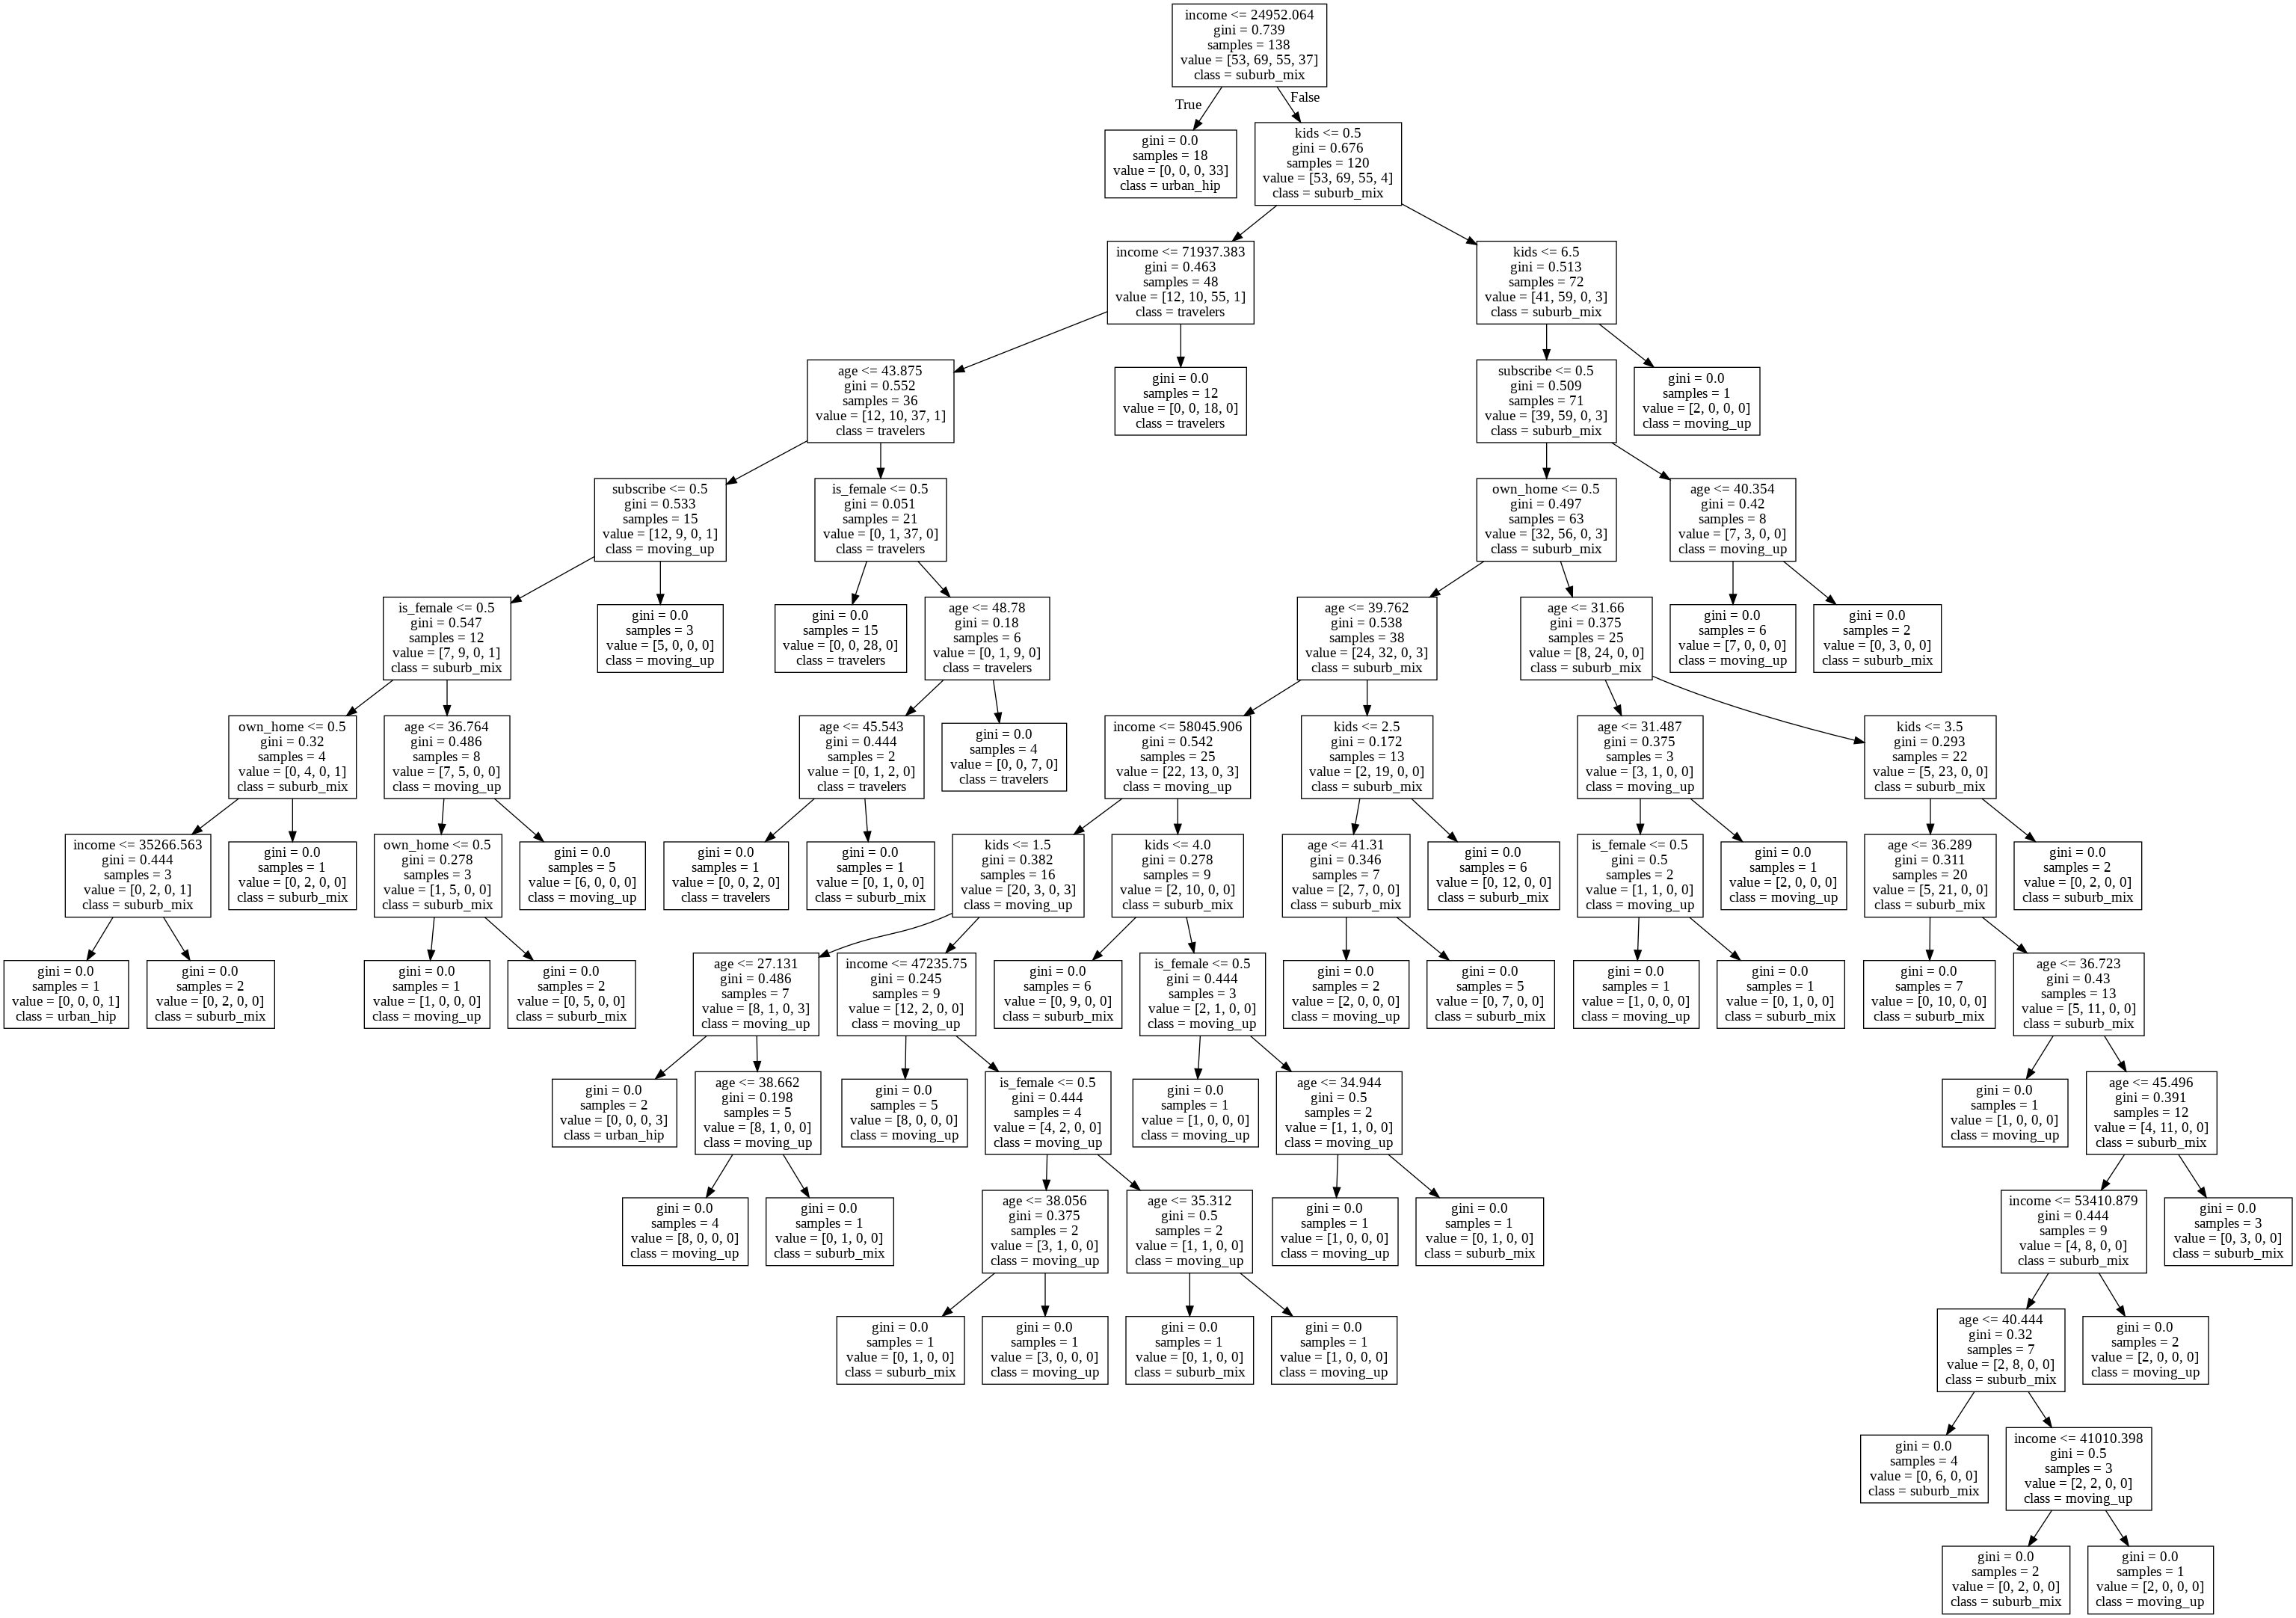

In [188]:
import graphviz
from sklearn import tree
from IPython.display import Image
tree_0 = rf.estimators_[0]
dot_data = tree.export_graphviz(tree_0, out_file=None,
feature_names=X_train.columns,
class_names=rf.classes_)
tree_graph = graphviz.Source(dot_data, format='png')
tree_graph.render('tmp', view=True)
Image('tmp.png', width=1000, height=1000)

In [189]:
def pairwise_decision_boundary(model, X_train, y_train,
        X_test, y_test,first_column, second_column,jitter=False):
  width, height = 1000, 1000
  # Create a class mapper to map from class string to an integer
  class_mapper = {c:i for i,c in enumerate(model.classes_)}
  x0 = X_train[first_column]
  x1 = X_train[second_column]
  # Get evenly spaced values between the min and max values
  x0_g = np.linspace(x0.min(), x0.max(), width)
  x1_g = np.linspace(x1.min(), x1.max(), height)
  # Create a "grid" of those evenly spaced values from each vector
  xx, yy = np.meshgrid(x0_g, x1_g)
  # Stack together all of the sampled values
  X_grid = np.vstack([xx.ravel(), yy.ravel()]).T
  model_c = clone(model)
  model_c.fit(X_train.loc[:,[first_column, second_column]], y_train)
  X_grid_labels = model_c.predict(X_grid)
  # Plot the predicted values
  j_x0, j_x1 = 0, 0
  if jitter:
    j_x0 = (np.random.random(X_test.shape[0])-0.5)/10.
    j_x1 = (np.random.random(X_test.shape[0])-0.5)/10.
  a = plt.scatter(X_test[first_column] + j_x0,
        X_test[second_column] + j_x1,
        c=[class_mapper[l] for l in y_test],
        cmap=plt.cm.rainbow,
        edgecolor='k', vmin=0, vmax=3)
  plt.contourf(xx, yy,
        np.reshape([class_mapper[l] for l in X_grid_labels],
        (width, height)),
        cmap=a.cmap, alpha=0.5, levels=3)
  plt.title('Decision boundaries with true values overlaid')
  plt.xlabel(first_column)
  plt.ylabel(second_column)
  cb = plt.colorbar(ticks=[0.5, 1.2, 2, 2.8])
  cb.ax.set_yticklabels(model.classes_)

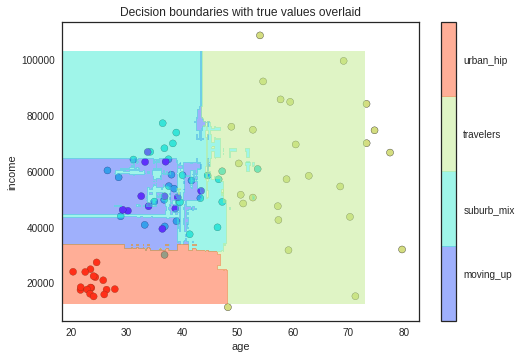

In [190]:
pairwise_decision_boundary(rf, X_train, y_train, X_test, y_test,
'age', 'income')

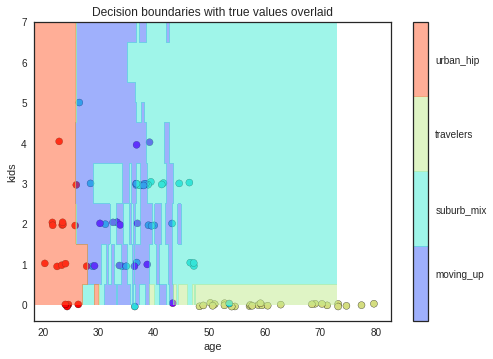

In [191]:
pairwise_decision_boundary(rf, X_train, y_train, X_test, y_test,
'age', 'kids', jitter=True)

In [192]:
pd.DataFrame(rf.predict_proba(X_test), columns=rf.classes_).sample(5)

,moving_up,suburb_mix,travelers,urban_hip
1,0.00,0.00,1.00,0.00
16,0.00,0.08,0.92,0.00
78,0.10,0.00,0.00,0.90
70,0.04,0.00,0.00,0.96
10,0.02,0.04,0.94,0.00


In [193]:
##Random Forest Variable Importance
pd.Series(rf.feature_importances_,
index=seg_sub.columns).sort_values(ascending=False)

age          0.437028
income       0.313560
kids         0.150136
is_female    0.035421
own_home     0.032164
subscribe    0.031691
dtype: float64

In [195]:
## PRediction : Identifying potential customers
subscribe_label = seg_sub.subscribe
seg_sub_nosub = seg_sub.drop('subscribe', axis=1)
np.random.seed(7885)
rand_idx = np.random.rand(subscribe_label.shape[0])
train_idx = rand_idx <= 0.65
test_idx = rand_idx > 0.65
X_train = seg_sub_nosub.iloc[train_idx]
X_test = seg_sub_nosub.iloc[test_idx]
y_train = subscribe_label.iloc[train_idx]
y_test = subscribe_label.iloc[test_idx]

In [197]:
rf_sub = ensemble.RandomForestClassifier(n_estimators=100,
random_state=86,
class_weight=\
'balanced_subsample')
rf_sub.fit(X_train, y_train)
y_pred = rf_sub.predict(X_test)

In [198]:
rf_sub.score(X_test, y_test)

0.9072164948453608

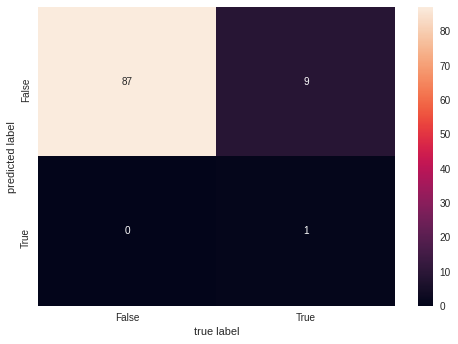

In [199]:
confusion_matrix(y_test, y_pred, rf_sub)

In [200]:
from sklearn import model_selection
rf_sub_cv = ensemble.RandomForestClassifier(random_state=34,
class_weight=\
'balanced_subsample')
parameters = {'n_estimators': [10, 100, 500],
'max_depth': [5, 10, 30],
'min_samples_split': [2,5],
'min_samples_leaf': [1,2,5]}
clf = model_selection.GridSearchCV(rf_sub_cv, parameters,
cv=5, scoring='f1_weighted')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=34,
                  

In [201]:
clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

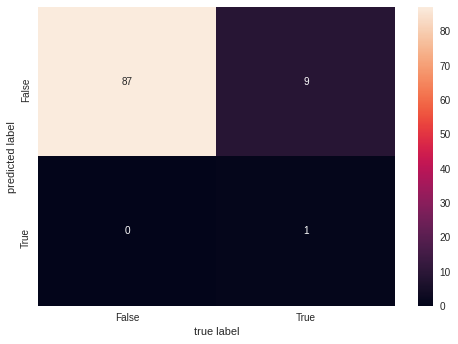

In [202]:
y_pred_be = clf.best_estimator_.predict(X_test)
confusion_matrix(y_test, y_pred_be, clf.best_estimator_)

In [205]:
rf_sub_cv = ensemble.RandomForestClassifier(random_state=34,
 class_weight=\
 'balanced_subsample')
parameters = {'n_estimators': [10, 100, 500],
  'max_depth': [5, 10, 30],
  'min_samples_split': [2,5],
  'min_samples_leaf': [1,2,5]}
clf = model_selection.GridSearchCV(rf_sub_cv, parameters,
  cv=5, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=34,
                  

In [206]:
clf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

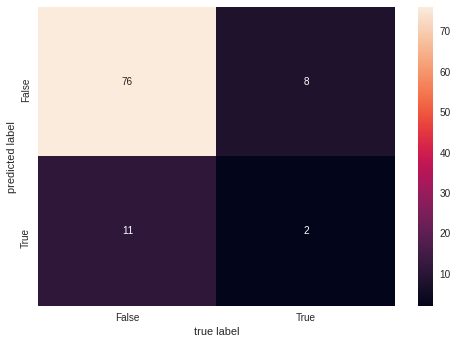

In [207]:
y_pred_be = clf.best_estimator_.predict(X_test)
confusion_matrix(y_test, y_pred_be, clf.best_estimator_)

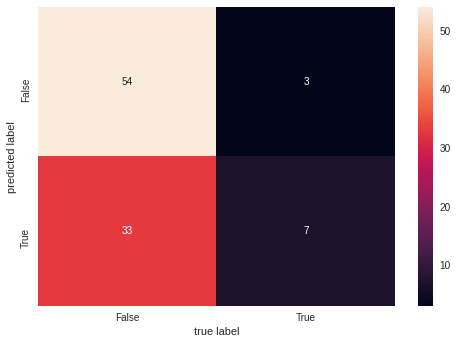

In [208]:
rf_sub = ensemble.RandomForestClassifier(n_estimators=10,
random_state=86,
max_depth=5,
min_samples_leaf=2,
min_samples_split=2,
class_weight=\
{False: 1, True:50})
rf_sub.fit(X_train, y_train)
y_pred = rf_sub.predict(X_test)
confusion_matrix(y_test, y_pred, rf_sub)